### One-Dimensional Aggregation: Respondent Metadata with Coded Short Free-Text Answers

### TODO for Thesis/Publication: Harmonize Graphics Layout/Labeling/Dimensions/...

Also: Decide whether to sort (and if so, whether to sort by Pos/Neg or by individual levels). Depending on the decision, we might have to add helper columns.

NB: The unit of analysis being aggregated here is the individual vote cast by participants.

### Variable Reminder:

* v_5: primary working area
* v_6: free text in case of other in v5
* **v_5_6_merged**
* v_11: free text years of primary working area experience
* **v_11_coded**
* v_118-v_121: intensity of involvement in RE (v118 most intense)
* v_12: CS degree
* v_14: team size
* v_15: class of systems in project scope
* v_16: free text in case of other in v15
* **v_15_16_merged**
* v_19: free text industry sector
* **v_19_coded**
* v_124: country

Thus, the analysis from the previous notebook does not change for all variables but the following:
- Primary Working Area
- Years of Primary Working Area Experience
- Class of Systems in Project Scope
- Industry Sector

However, the analysis of the other variables is a convenient way to check that we didn't mess up any of the merges.
Therefore, we repeat those analyses and also save the graphics with `_coded` added to the file name. 
These graphics should look exactly like the ones produced with the other votelist (no coding).

In [1]:
exportdate = 20180327
projectname = 'repract'

The usual preparations...

In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import datetime
now = datetime.datetime.now().strftime('%Y%m%d')

In [3]:
%matplotlib notebook

In [4]:
sns.set_style('darkgrid')

In [5]:
ratings = ['Essential', 'Worthwhile', 'Unimportant', 'Unwise']
teamsizes = ['Small (1-4)', 'Medium (5-10)', 'Larger (10-49)', 'Very large (50+)']

In [6]:
# the sole difference to the previous notebook lies in the addition of '_coded' to the file name
df = pd.read_csv(f'../analysis/{exportdate}{projectname}_votelist_with_respondentmeta_coded.csv')
df['Vote'] = pd.Categorical(df['Vote'].values, categories=ratings)
df['v_14'] = pd.Categorical(df['v_14'].values, categories=teamsizes)
df.head(1)

,EvID,PaperID,Vote,v_5,v_6,v_6_coded,v_5_6_merged,v_11,v_11_coded,v_12,...,v_16,v_16_coded,v_15_16_merged,v_19,v_19_coded,v_124,v_118,v_119,v_120,v_121
0,2,10,Worthwhile,Other (please specify),Product Management Coach,Manager,Manager,10,10.0,No,...,Customer facing software products,(Business) information systems,(Business) information systems,Wide range (from automotive supplier to insura...,Automotive,Germany,quoted,quoted,quoted,not quoted


### By Country (v_124)

In [7]:
bycountry = df.groupby(['v_124', 'Vote']
            ).count().reset_index().rename({'index':'v_124'}
            ).pivot('v_124', 'Vote', 'EvID').sort_index(ascending=False).fillna(0)#[ratings]
#bycountry['TotalVotes'] = bycountry.sum(axis=1)
bycountry.head(2)

Vote,Essential,Worthwhile,Unimportant,Unwise
v_124,,,,
Uruguay,2.0,5.0,5.0,3.0
United States,49.0,102.0,48.0,1.0


Counts

<IPython.core.display.Javascript object>


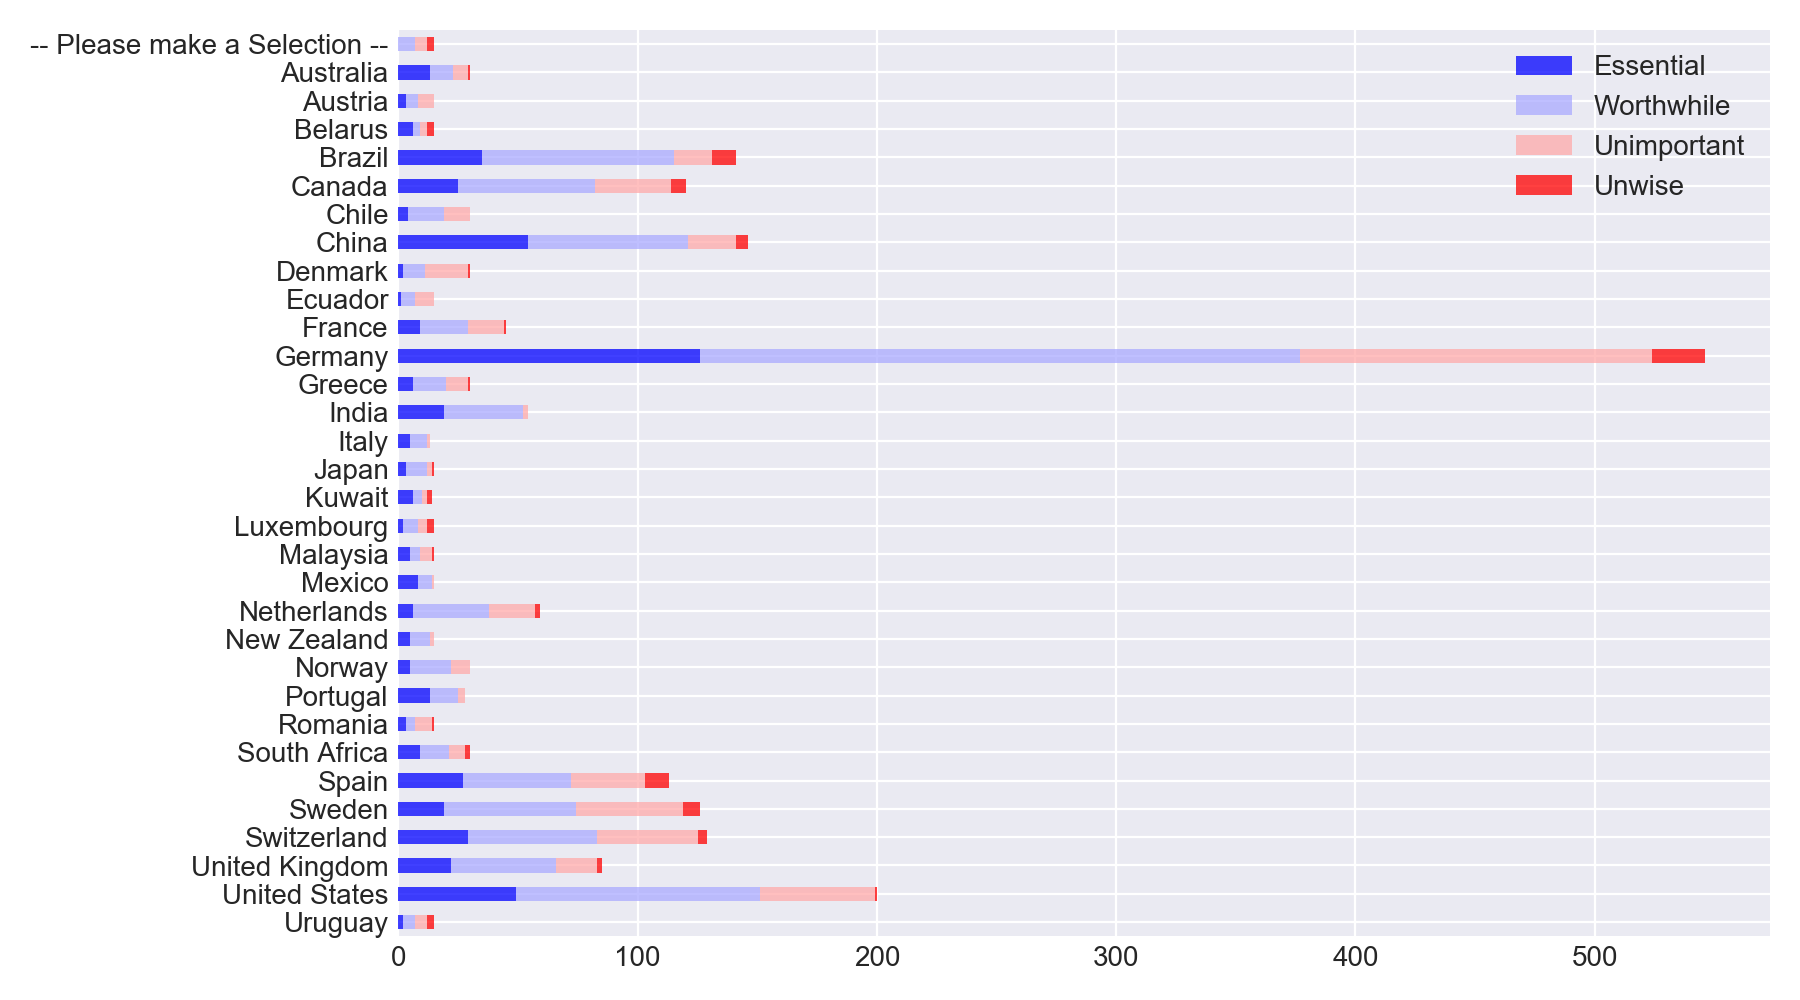

In [8]:
bycountry.plot.barh(stacked=True, cmap='bwr', figsize=(9,5), alpha=0.75)
plt.ylabel('')
plt.legend(title='')
plt.tight_layout()
plt.savefig(f'../graphics/{now}_Respondents_Country_abs_coded.pdf')

Percentages

In [9]:
(bycountry.T / bycountry.T.sum()).T

Vote,Essential,Worthwhile,Unimportant,Unwise
v_124,,,,
Uruguay,0.133333,0.333333,0.333333,0.200000
United States,0.245000,0.510000,0.240000,0.005000
United Kingdom,0.258824,0.517647,0.200000,0.023529
Switzerland,0.224806,0.418605,0.325581,0.031008
Sweden,0.150794,0.436508,0.357143,0.055556
Spain,0.238938,0.398230,0.274336,0.088496
South Africa,0.300000,0.400000,0.233333,0.066667
Romania,0.200000,0.266667,0.466667,0.066667
Portugal,0.464286,0.428571,0.107143,0.000000


<IPython.core.display.Javascript object>


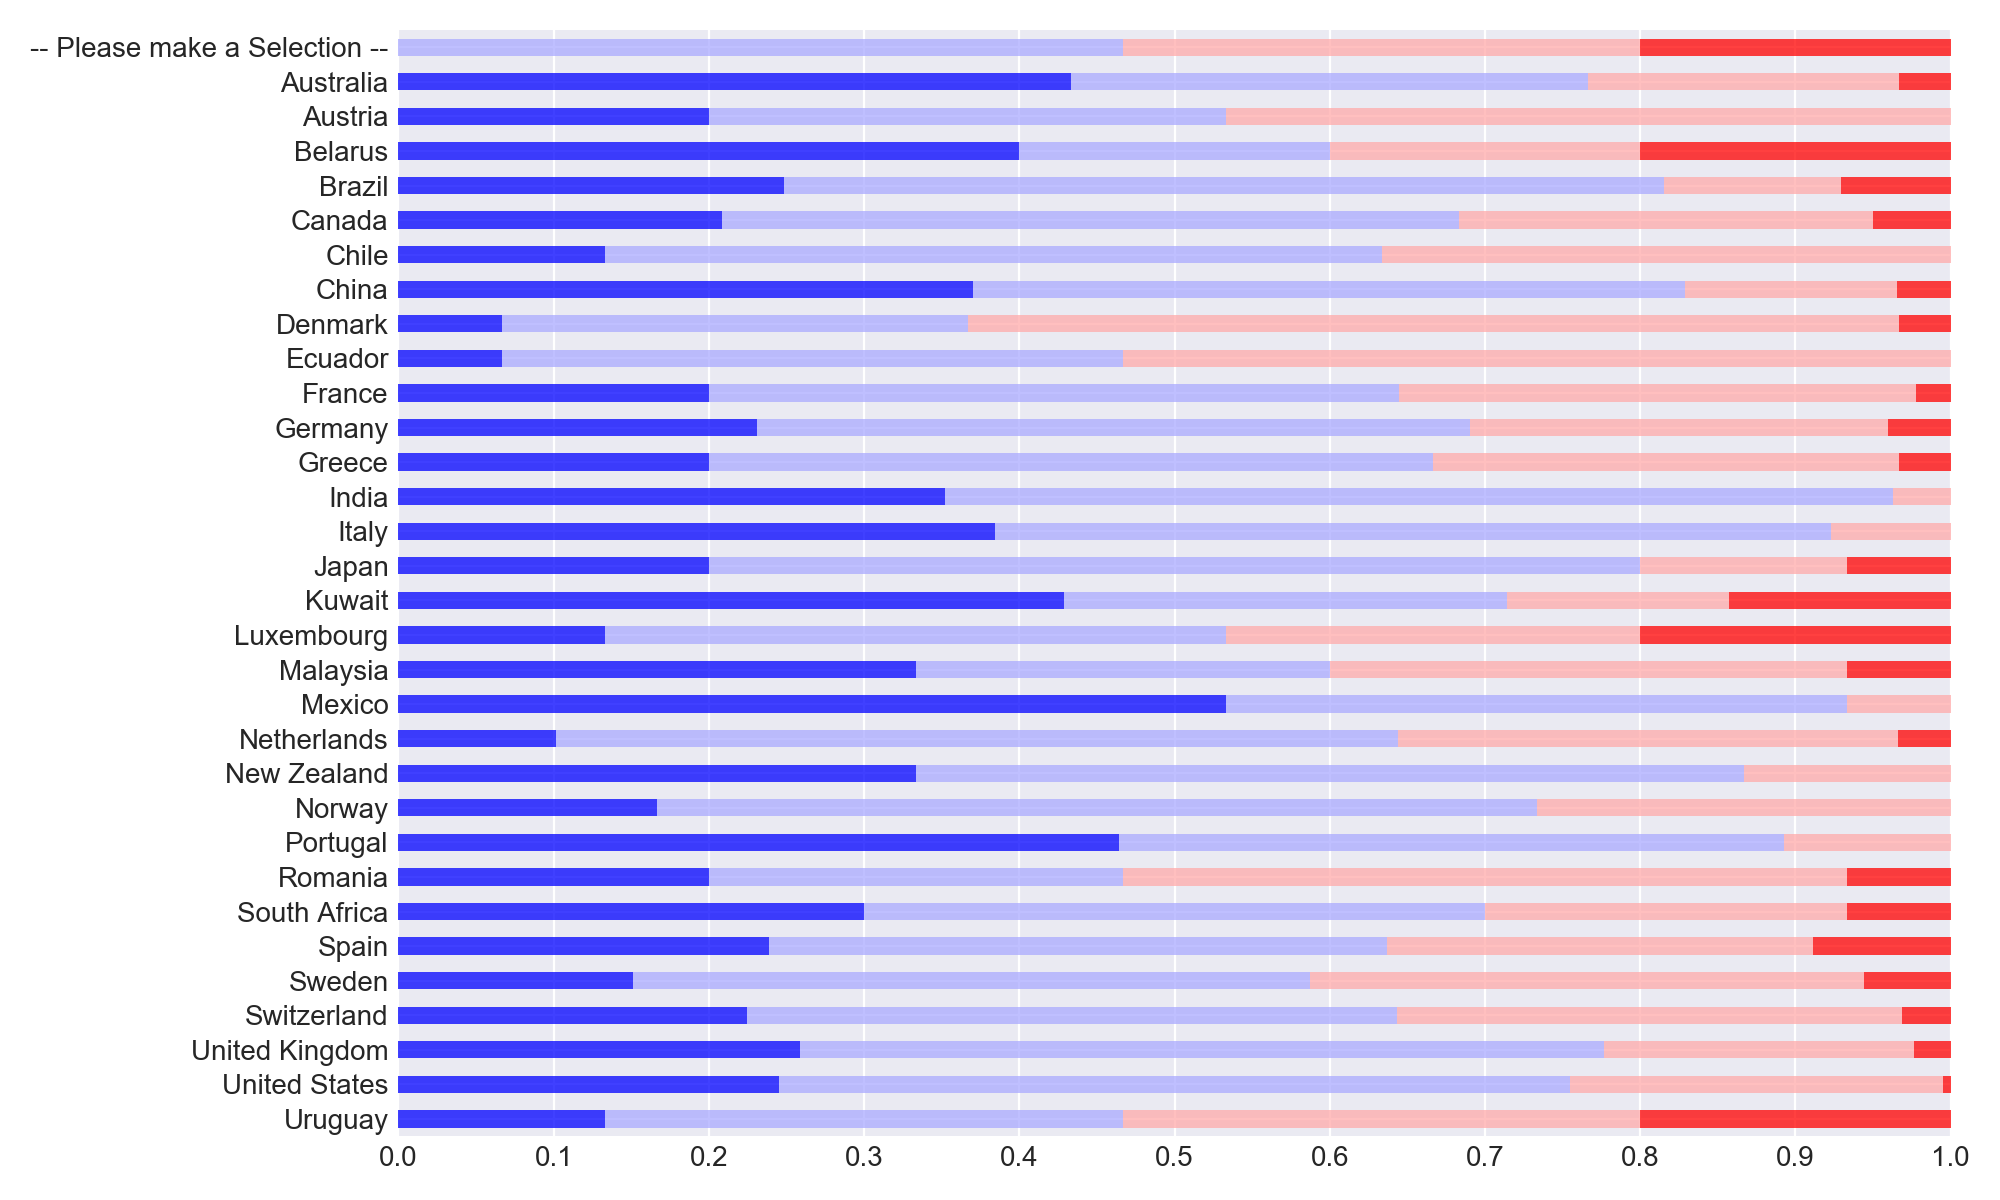

In [45]:
(bycountry.T / bycountry.T.sum()).T.plot.barh(stacked=True, cmap='bwr', figsize=(10,6), alpha=0.75)
plt.legend([])
plt.ylabel('')
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.tight_layout();
plt.savefig(f'../graphics/{now}_Respondents_Country_rel_coded.pdf')

### By Role (v_5_6_merged)

In [11]:
byrole = df.groupby(['v_5_6_merged', 'Vote']
            ).count().reset_index().rename({'index':'v_5_6_merged'}
                                          ).pivot('v_5_6_merged', 'Vote', 'EvID'
            ).sort_index(ascending=False).fillna(0)

<IPython.core.display.Javascript object>


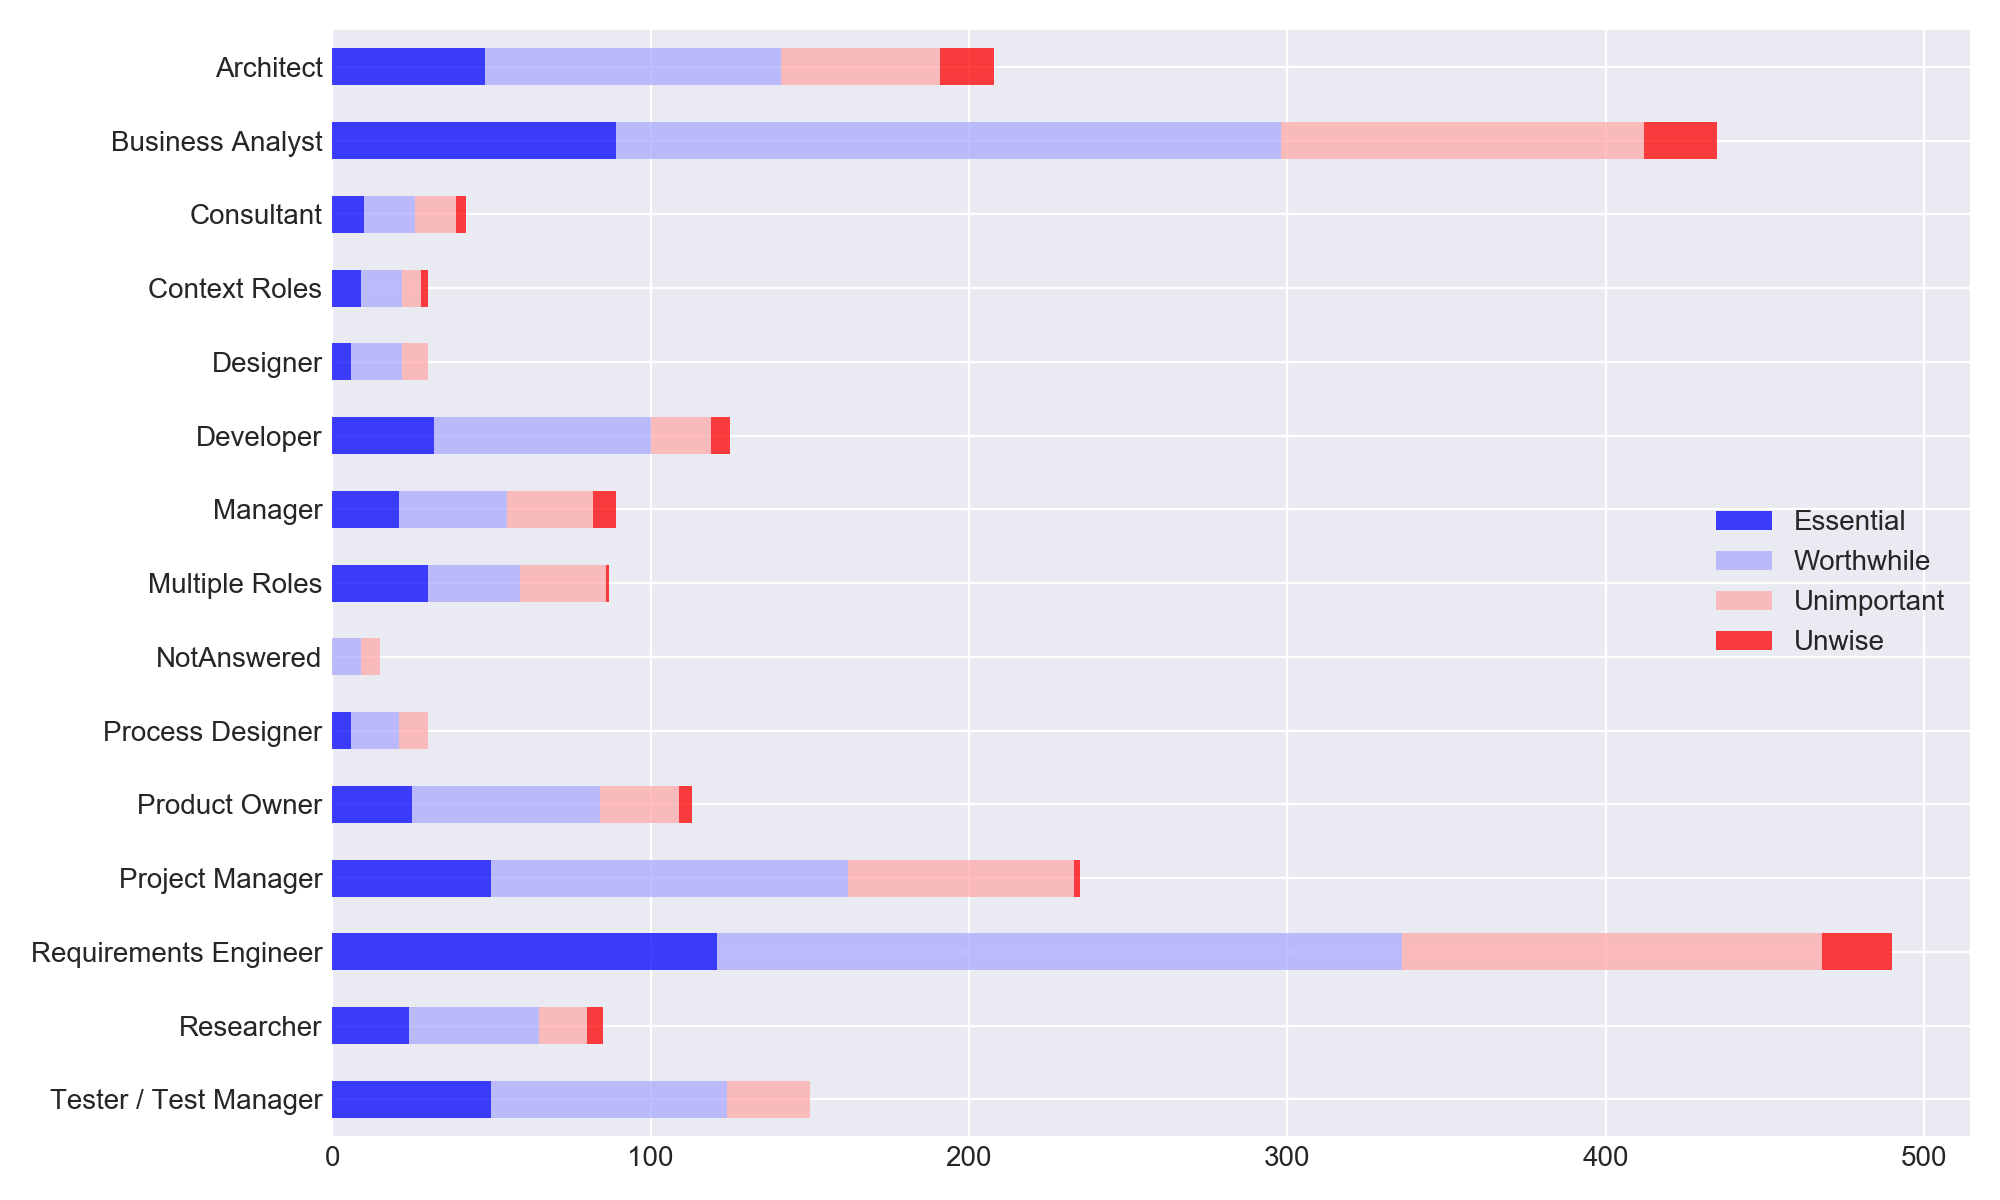

In [82]:
byrole.plot.barh(
    stacked=True, cmap='bwr', figsize=(10,6), alpha=0.75)
plt.legend(loc='center right');
plt.ylabel('')
plt.tight_layout()
plt.savefig(f'../graphics/{now}_Respondents_Role_abs_coded.pdf')

<IPython.core.display.Javascript object>


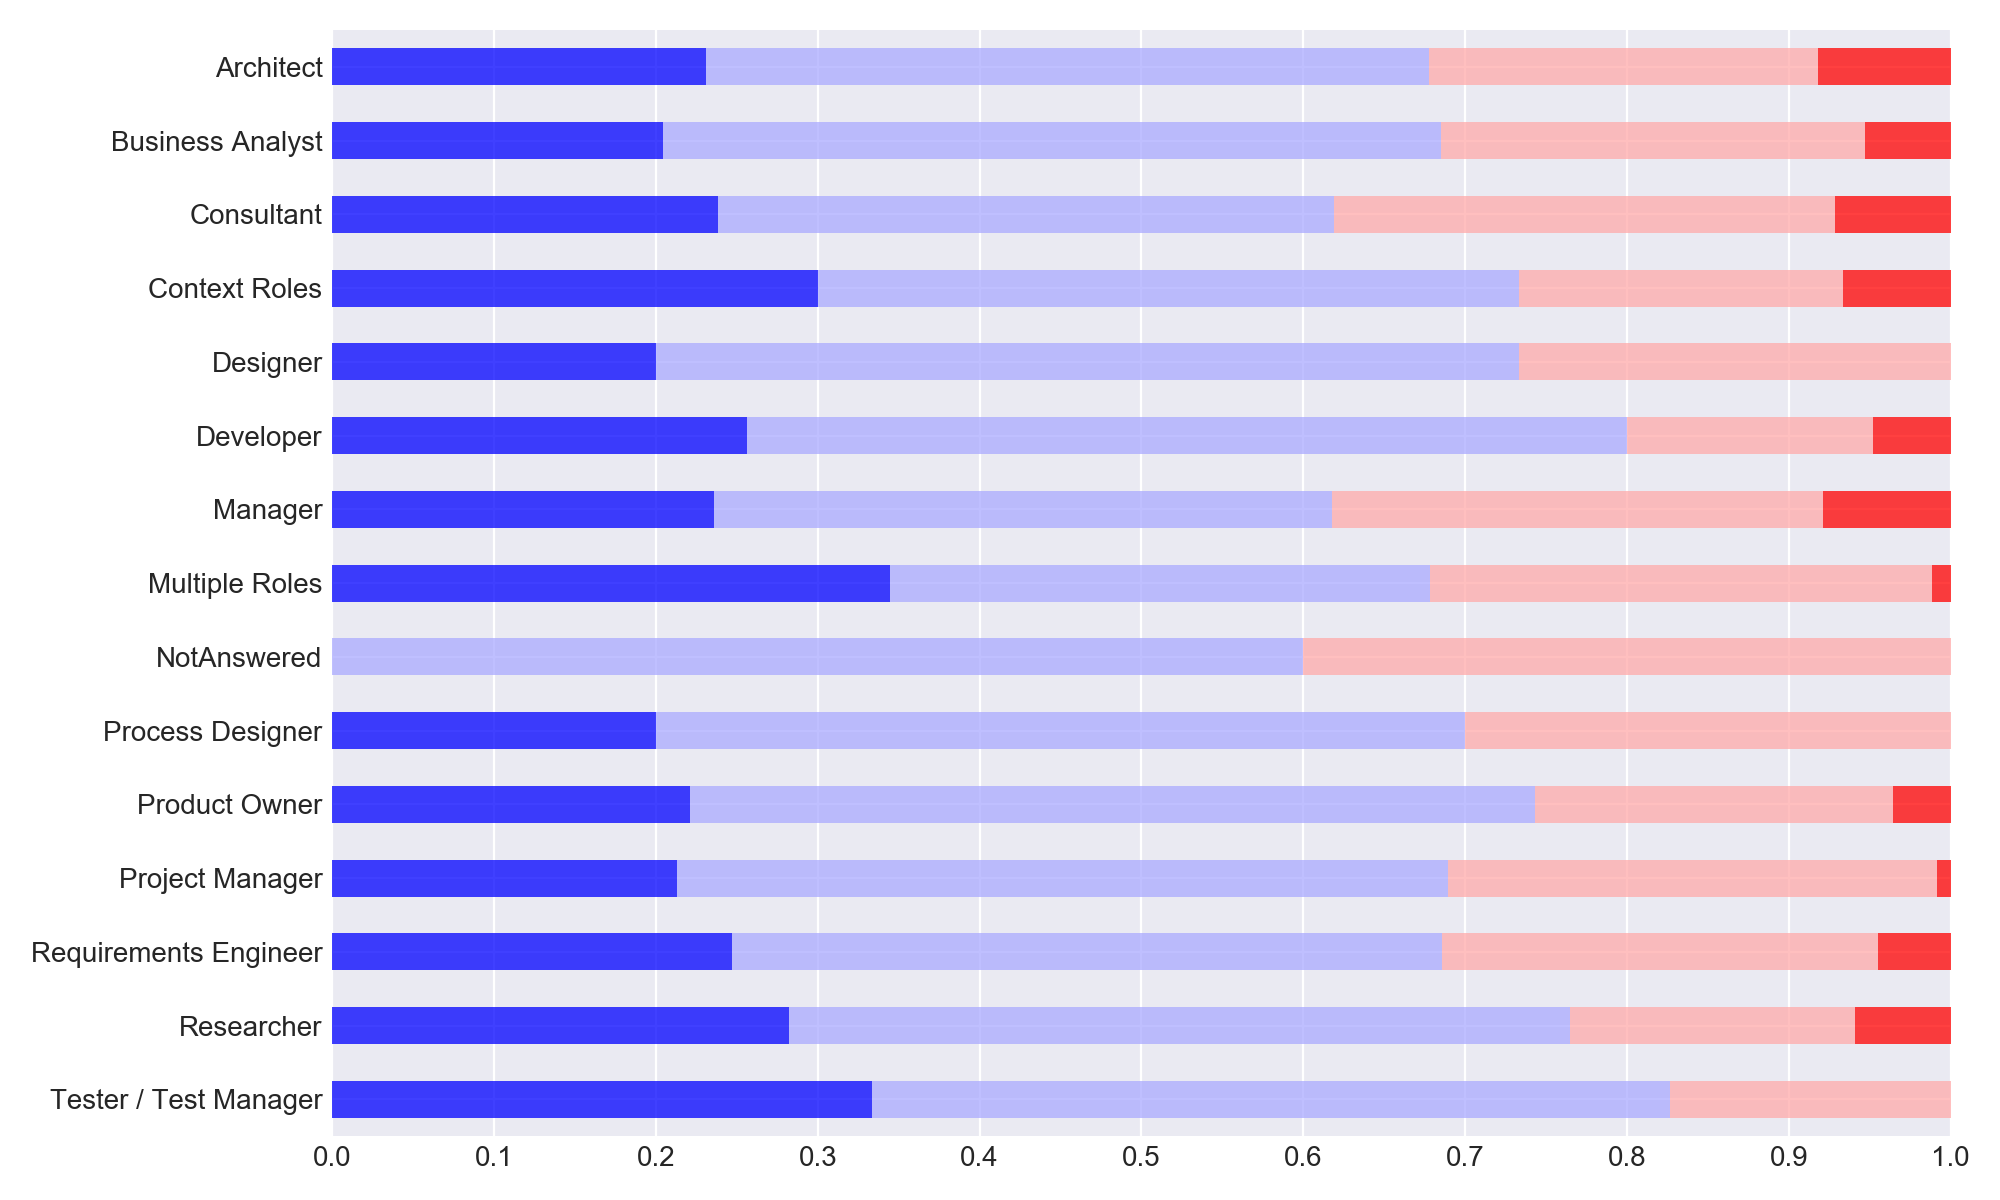

In [98]:
(byrole.T / byrole.T.sum()).T.plot.barh(stacked=True, cmap='bwr', figsize=(10,6), alpha=0.75)
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.legend([]);
plt.ylabel('')
plt.tight_layout()
plt.savefig(f'../graphics/{now}_Respondents_Role_rel_coded.pdf')

You might wonder where the 'NotAnswered' comes from - at least I did.
But: there is exactly one record in the original data with 'Other (please specify)' on v_5 and 'NotAnswered' on v_6. 
Sadness.

### By Years of Experience in Sector (v_11_coded)

In [56]:
by_experience = pd.DataFrame(df, copy=True)
by_experience['v_11_coded_binned'] = pd.cut(df.v_11_coded, range(0,51,5))
by_experience.head(2)

,EvID,PaperID,Vote,v_5,v_6,v_6_coded,v_5_6_merged,v_11,v_11_coded,v_12,...,v_16_coded,v_15_16_merged,v_19,v_19_coded,v_124,v_118,v_119,v_120,v_121,v_11_coded_binned
0,2,10,Worthwhile,Other (please specify),Product Management Coach,Manager,Manager,10,10.0,No,...,(Business) information systems,(Business) information systems,Wide range (from automotive supplier to insura...,Automotive,Germany,quoted,quoted,quoted,not quoted,"(5, 10]"
1,2,23,Unwise,Other (please specify),Product Management Coach,Manager,Manager,10,10.0,No,...,(Business) information systems,(Business) information systems,Wide range (from automotive supplier to insura...,Automotive,Germany,quoted,quoted,quoted,not quoted,"(5, 10]"


In [63]:
by_experience = by_experience.groupby(['v_11_coded_binned', 'Vote']).count().reset_index().rename({'index':'v_11_coded_binned'}
                                          ).pivot('v_11_coded_binned', 'Vote', 'EvID'
            ).sort_index(ascending=True).fillna(0)
by_experience

Vote,Essential,Worthwhile,Unimportant,Unwise
v_11_coded_binned,,,,
"(0, 5]",208.0,354.0,160.0,30.0
"(5, 10]",113.0,240.0,138.0,29.0
"(10, 15]",65.0,146.0,98.0,6.0
"(15, 20]",93.0,162.0,86.0,18.0
"(20, 25]",10.0,32.0,32.0,1.0
"(25, 30]",19.0,38.0,8.0,4.0
"(30, 35]",5.0,9.0,1.0,0.0
"(35, 40]",4.0,3.0,6.0,2.0
"(40, 45]",1.0,11.0,2.0,1.0


<IPython.core.display.Javascript object>


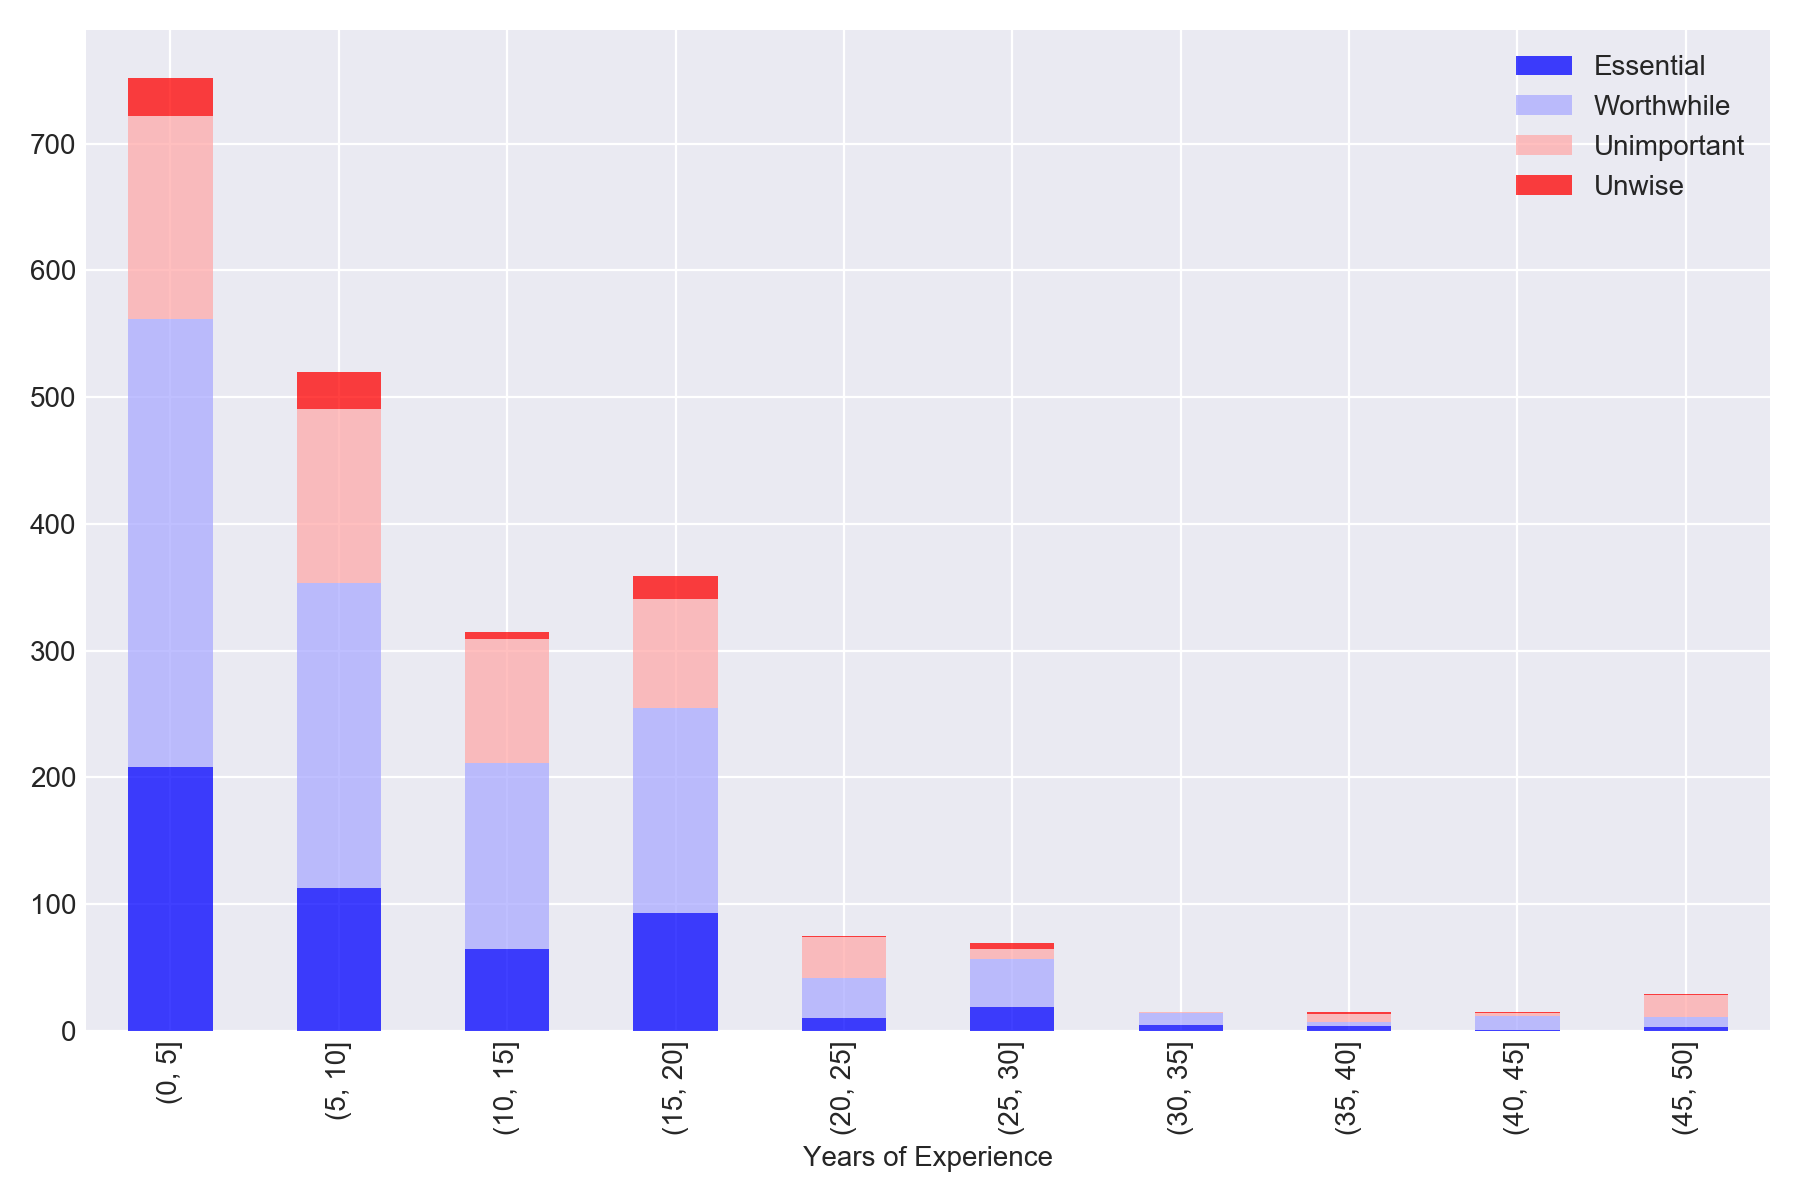

In [69]:
by_experience.plot.bar(
    stacked=True, cmap='bwr', figsize=(9,6), alpha=0.75)
plt.legend(title='');
plt.xlabel('Years of Experience')
plt.tight_layout()
plt.savefig(f'../graphics/{now}_Respondents_Experience_abs_coded.pdf')

<IPython.core.display.Javascript object>


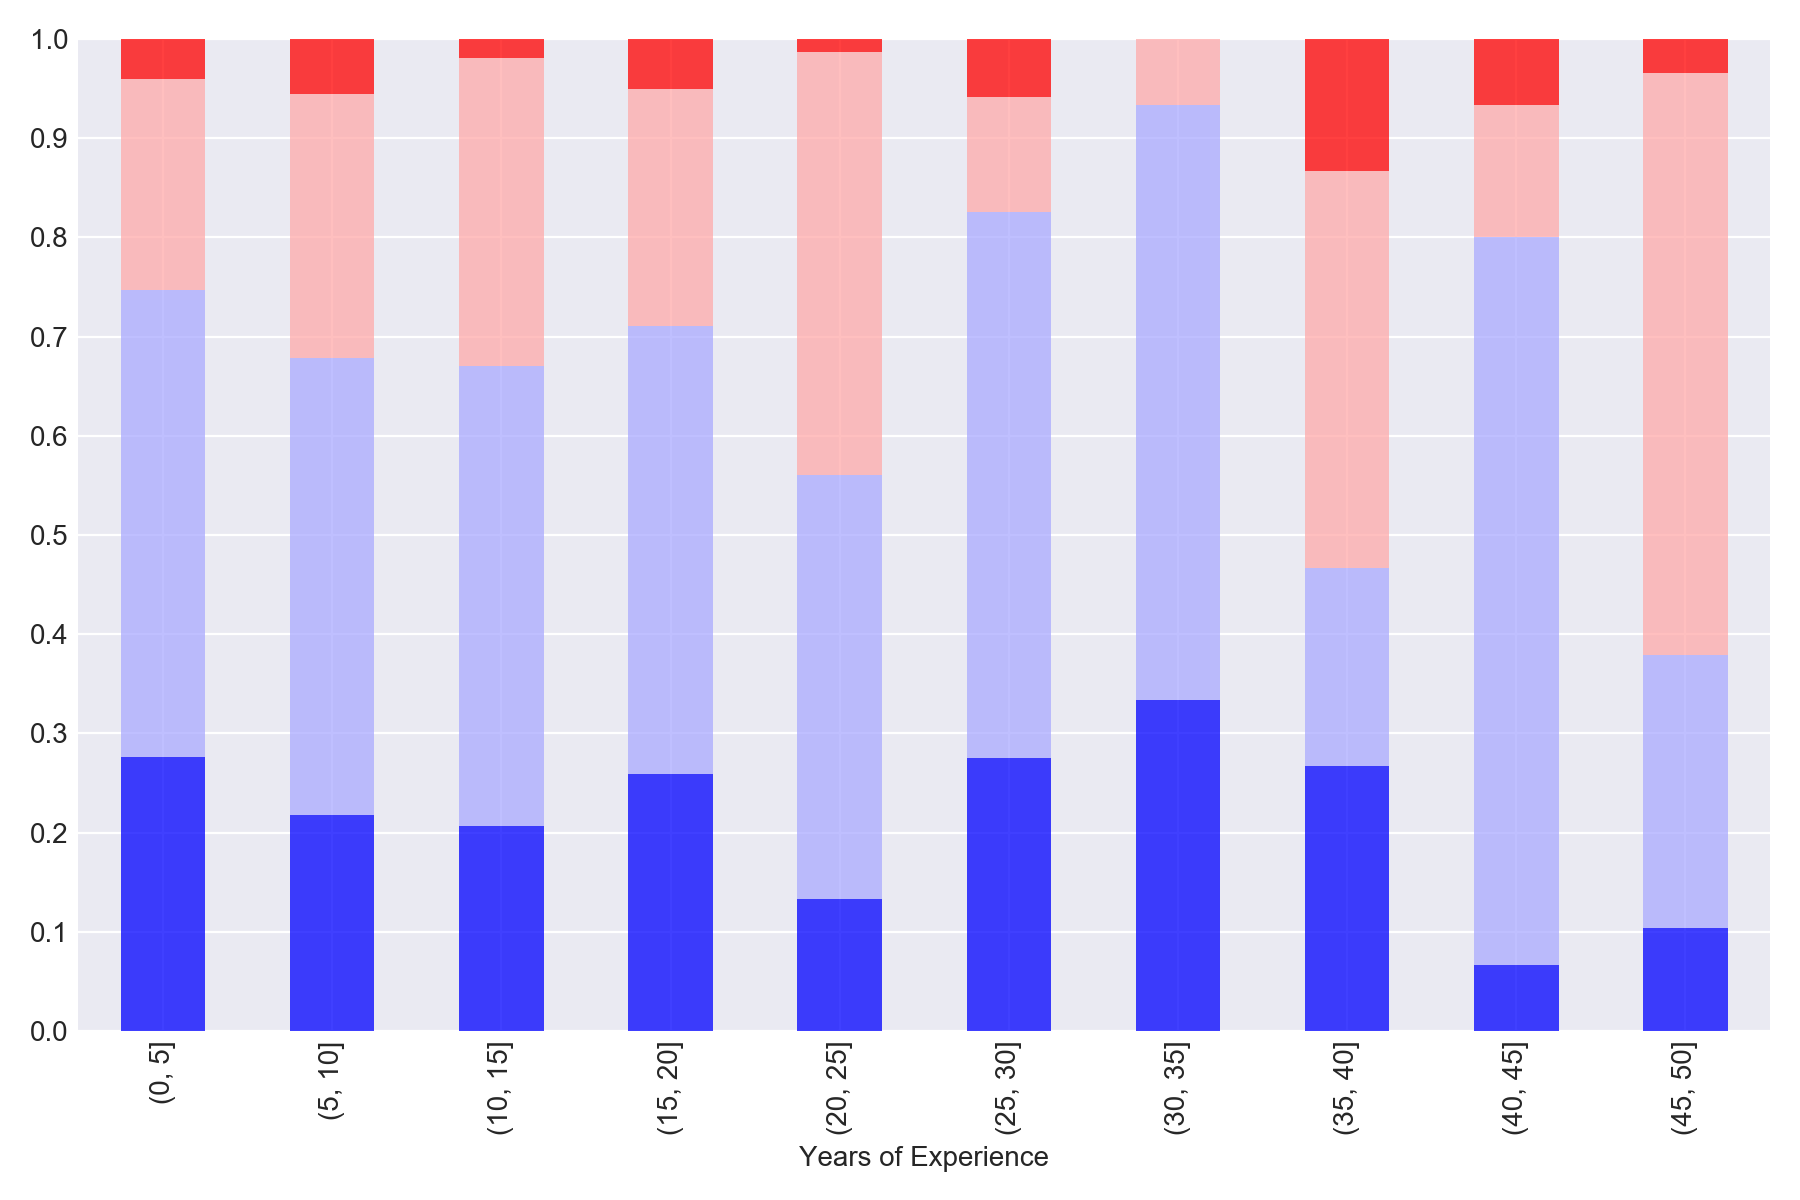

In [79]:
(by_experience.T / by_experience.T.sum()).T.plot.bar(stacked=True, cmap='bwr', figsize=(9,6), alpha=0.75)
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,0.1))
plt.legend([])
plt.xlabel('Years of Experience')
plt.tight_layout()
plt.savefig(f'../graphics/{now}_Respondents_Experience_rel_coded.pdf')

### By CS Degree (v_12)

In [23]:
csdegree = df.groupby(['v_12', 'Vote']).count()[['EvID']].reset_index(
).pivot('v_12', 'Vote', 'EvID')
csdegree

Vote,Essential,Worthwhile,Unimportant,Unwise
v_12,,,,
No,120,242,153,16
Yes,401,761,395,76


<IPython.core.display.Javascript object>


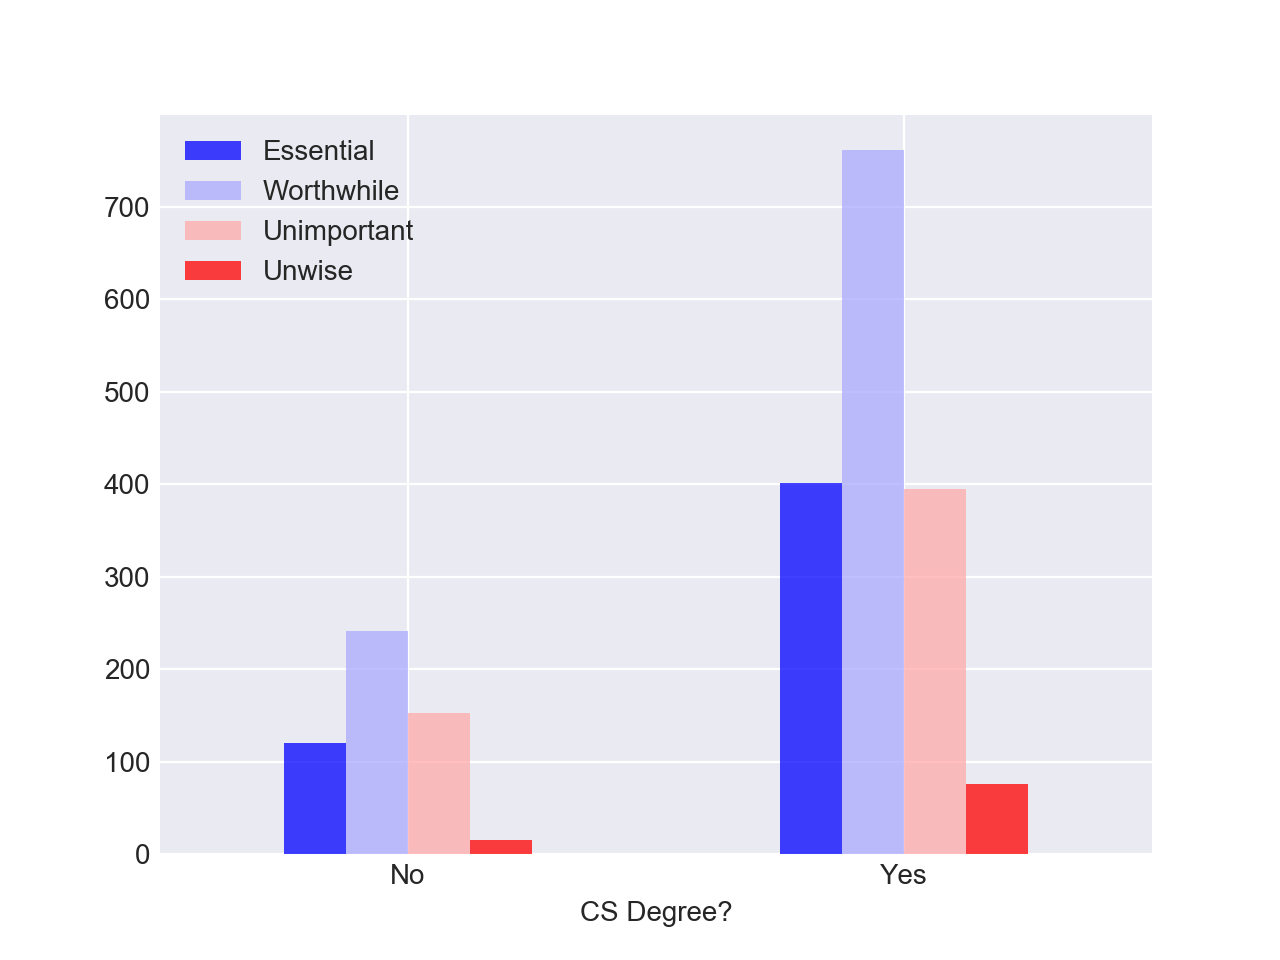

In [24]:
csdegree.plot.bar(cmap='bwr', alpha=0.75, rot=0)
plt.xlabel('CS Degree?');
plt.legend(title='')
plt.savefig(f'../graphics/{now}_Respondents_CS_Degree_abs_coded.pdf')

<IPython.core.display.Javascript object>


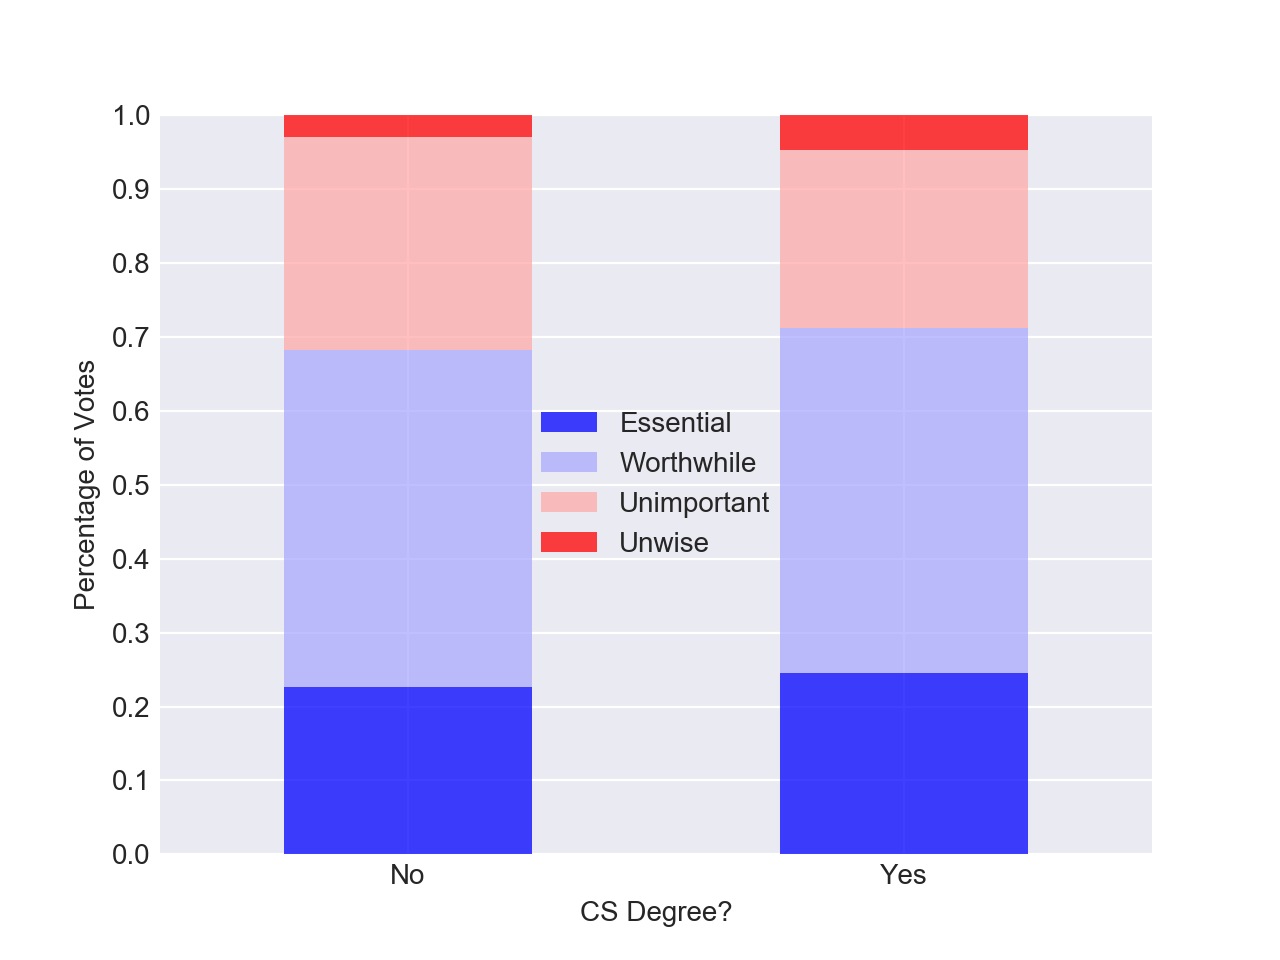

In [25]:
(csdegree.T / csdegree.T.sum()).T.plot.bar(stacked=True, cmap='bwr', alpha=0.75, rot=0)
plt.ylim(0,1)
plt.xlabel('CS Degree?')
plt.ylabel('Percentage of Votes')
plt.yticks(np.arange(0,1.1,0.1))
plt.legend(loc='center')
plt.savefig(f'../graphics/{now}_Respondents_CS_Degree_rel_coded.pdf')

### By Team Size (v_14)

In [26]:
teamsize = df.groupby(['v_14', 'Vote']).count()[['EvID']].reset_index(
).pivot('v_14', 'Vote', 'EvID')
teamsize

Vote,Essential,Worthwhile,Unimportant,Unwise
v_14,,,,
Small (1-4),102,167,88,20
Medium (5-10),211,433,261,39
Larger (10-49),153,316,141,22
Very large (50+),55,87,58,11


<IPython.core.display.Javascript object>


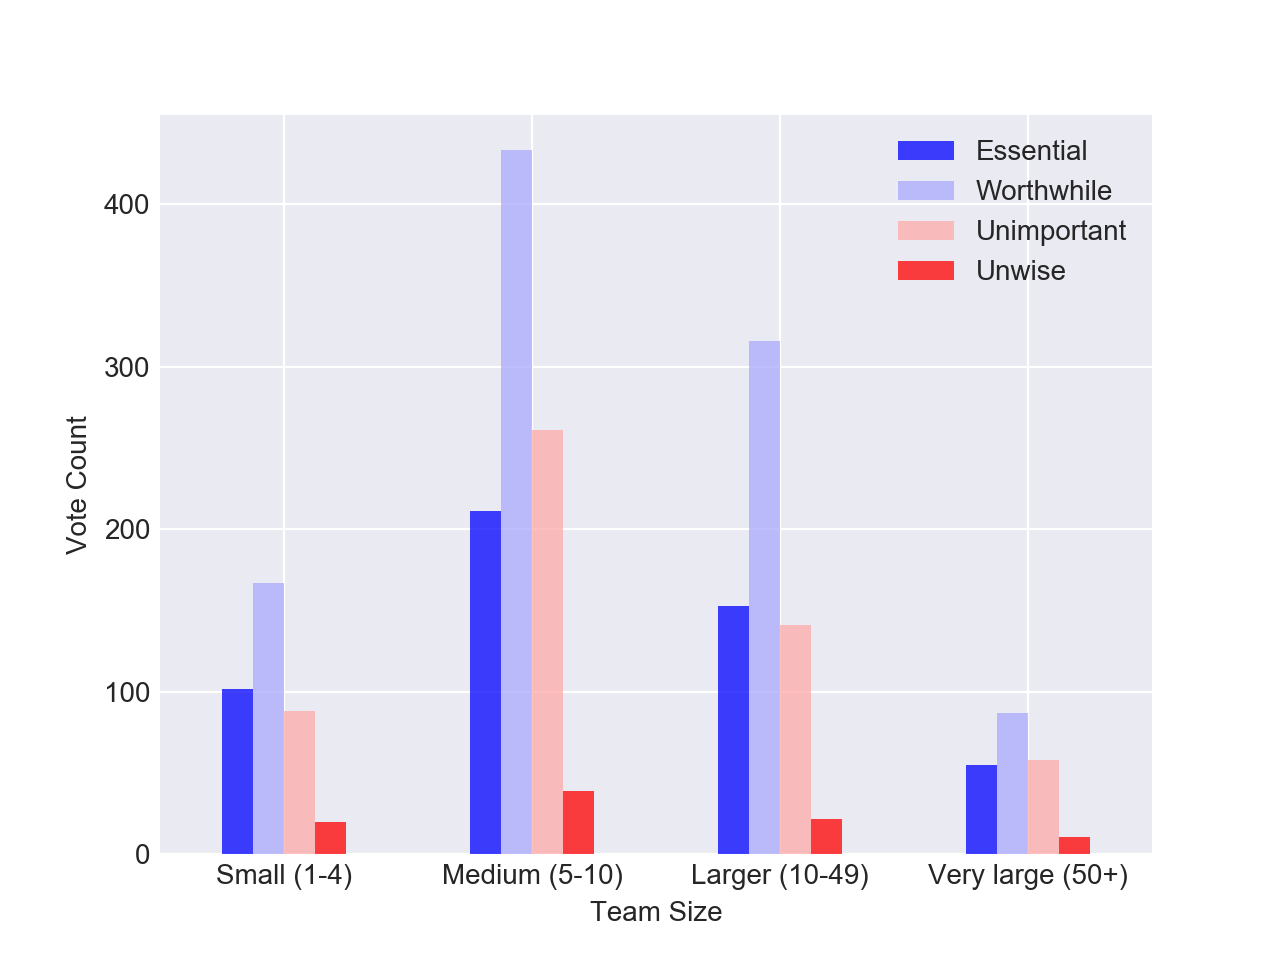

In [27]:
teamsize.plot.bar(rot=0, cmap='bwr', alpha=0.75)
plt.xlabel('Team Size')
plt.legend(title='')
plt.ylabel('Vote Count');
plt.savefig(f'../graphics/{now}_Respondents_Team_Size_abs_coded.pdf')

In [28]:
(teamsize.T / teamsize.T.sum()).T

Vote,Essential,Worthwhile,Unimportant,Unwise
v_14,,,,
Small (1-4),0.270557,0.442971,0.233422,0.053050
Medium (5-10),0.223517,0.458686,0.276483,0.041314
Larger (10-49),0.242089,0.500000,0.223101,0.034810
Very large (50+),0.260664,0.412322,0.274882,0.052133


<IPython.core.display.Javascript object>


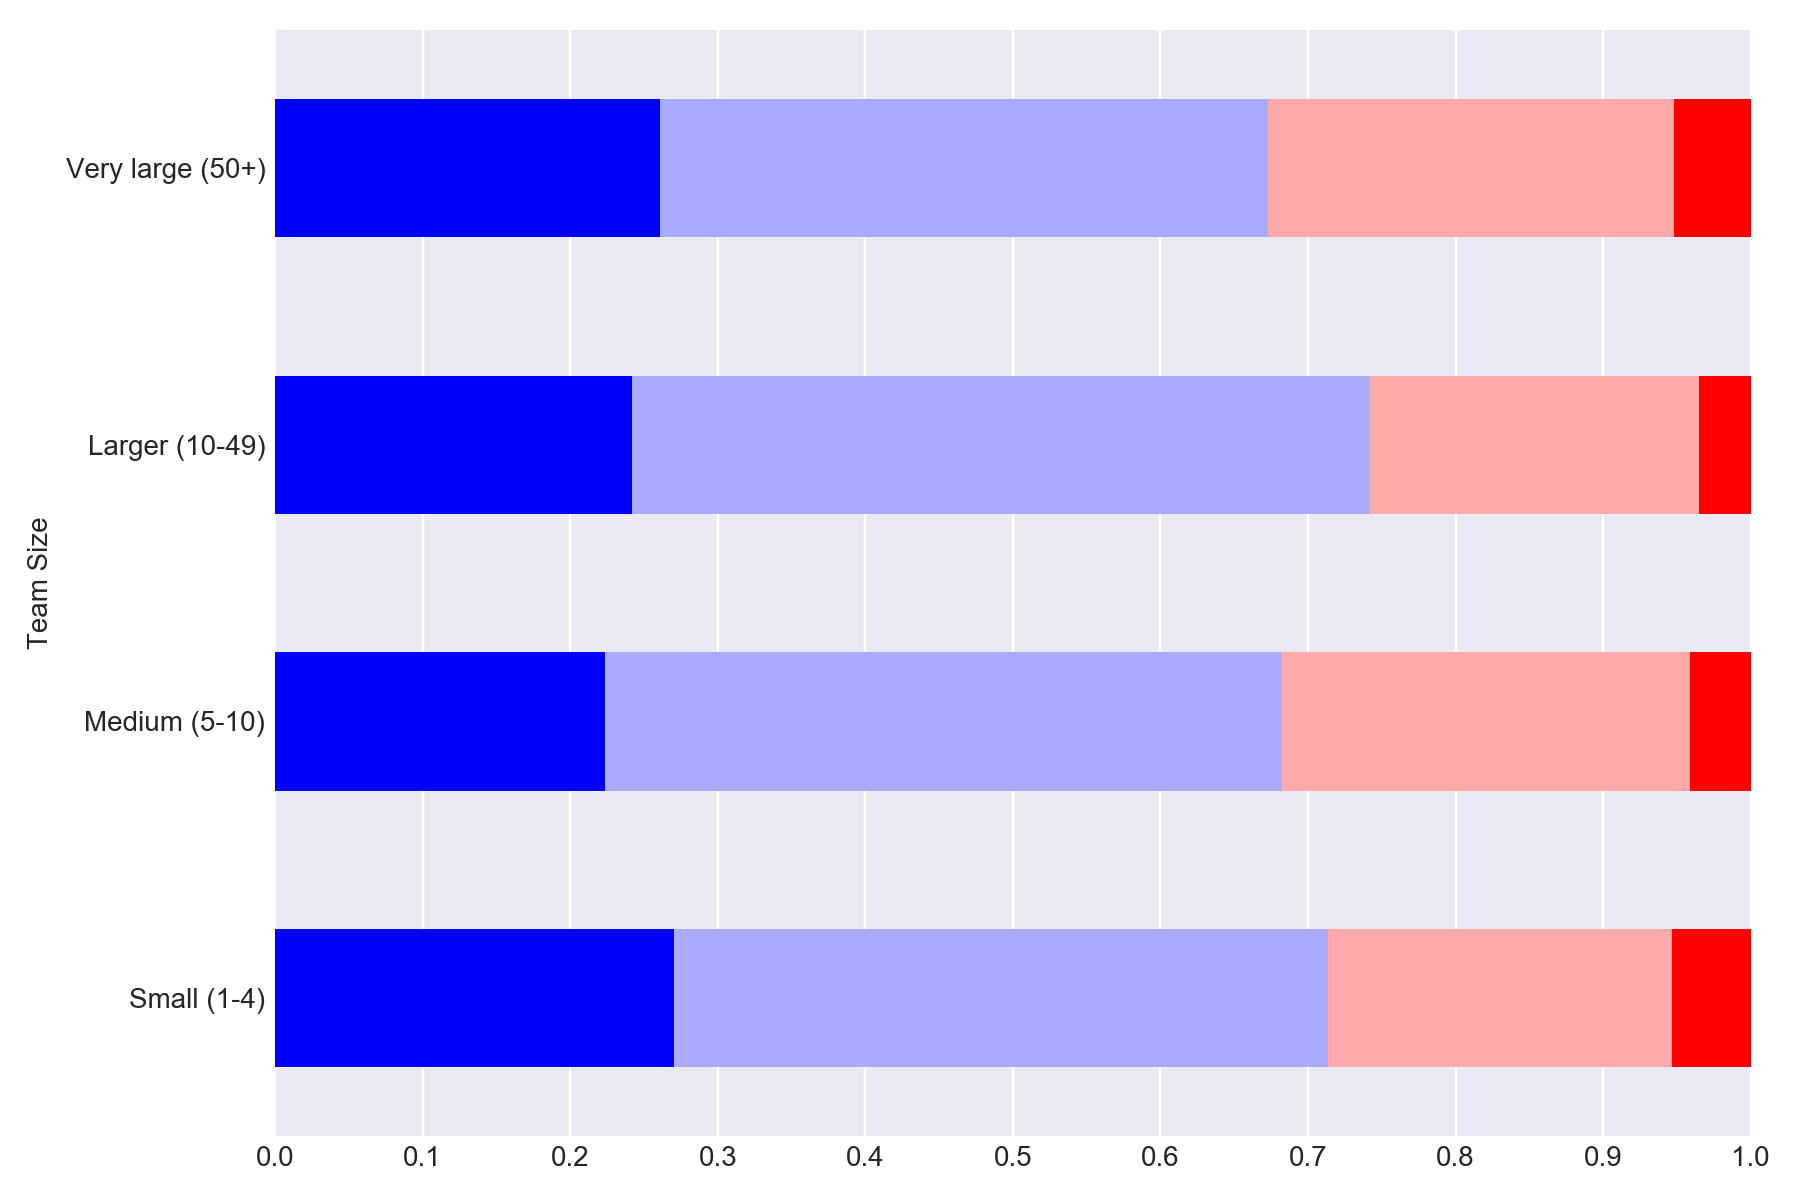

In [100]:
(teamsize.T / teamsize.T.sum()).T.plot.barh(stacked=True, cmap='bwr', figsize=(9,6))
plt.legend([])
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.ylabel('Team Size')
plt.tight_layout();
plt.savefig(f'../graphics/{now}_Respondents_Team_Size_rel_coded.pdf')

### By Class of Systems (v_15_16_merged)

In [31]:
systems = df.groupby(['v_15_16_merged', 'Vote']).count()[['EvID']].reset_index(
).pivot('v_15_16_merged', 'Vote', 'EvID').fillna(0)
systems

Vote,Essential,Worthwhile,Unimportant,Unwise
v_15_16_merged,,,,
(Business) information systems,266.0,503.0,272.0,55.0
Hardware,7.0,10.0,16.0,0.0
Hybrid / mix of embedded systems and information systems,123.0,256.0,155.0,25.0
Software-intensive embedded systems,125.0,234.0,105.0,12.0


<IPython.core.display.Javascript object>


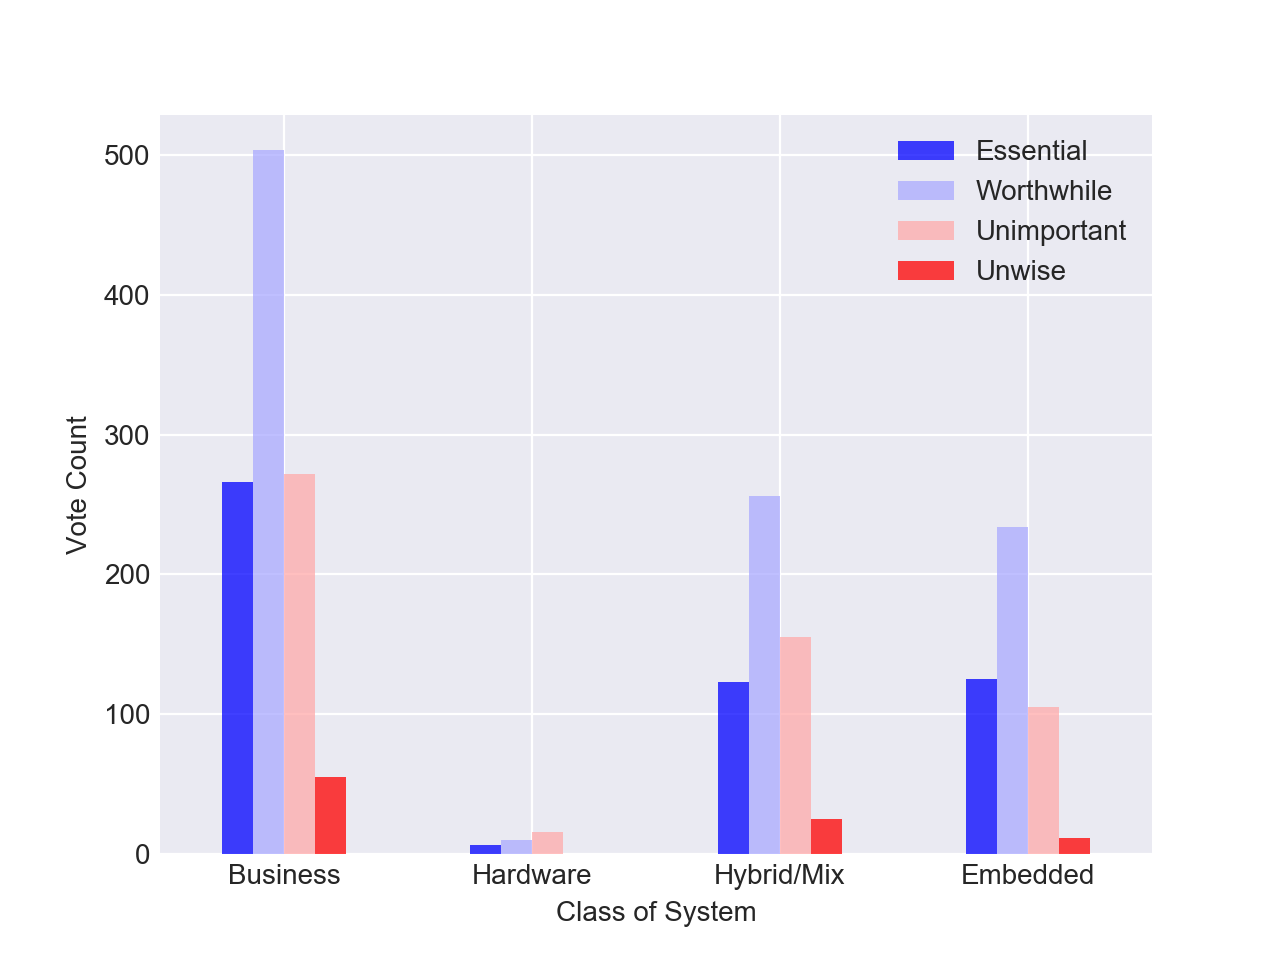

In [34]:
systems.plot.bar(cmap='bwr', rot=0, alpha=0.75)
plt.xlabel('Class of System')
plt.ylabel('Vote Count');
plt.legend(title='')
plt.xticks(np.arange(4), 
           ['Business', 'Hardware', 'Hybrid/Mix', 'Embedded']);
plt.savefig(f'../graphics/{now}_Respondents_System_Class_abs_coded.pdf')

In [35]:
(systems.T / systems.T.sum()).T

Vote,Essential,Worthwhile,Unimportant,Unwise
v_15_16_merged,,,,
(Business) information systems,0.242701,0.458942,0.248175,0.050182
Hardware,0.212121,0.303030,0.484848,0.000000
Hybrid / mix of embedded systems and information systems,0.220036,0.457961,0.277281,0.044723
Software-intensive embedded systems,0.262605,0.491597,0.220588,0.025210


<IPython.core.display.Javascript object>


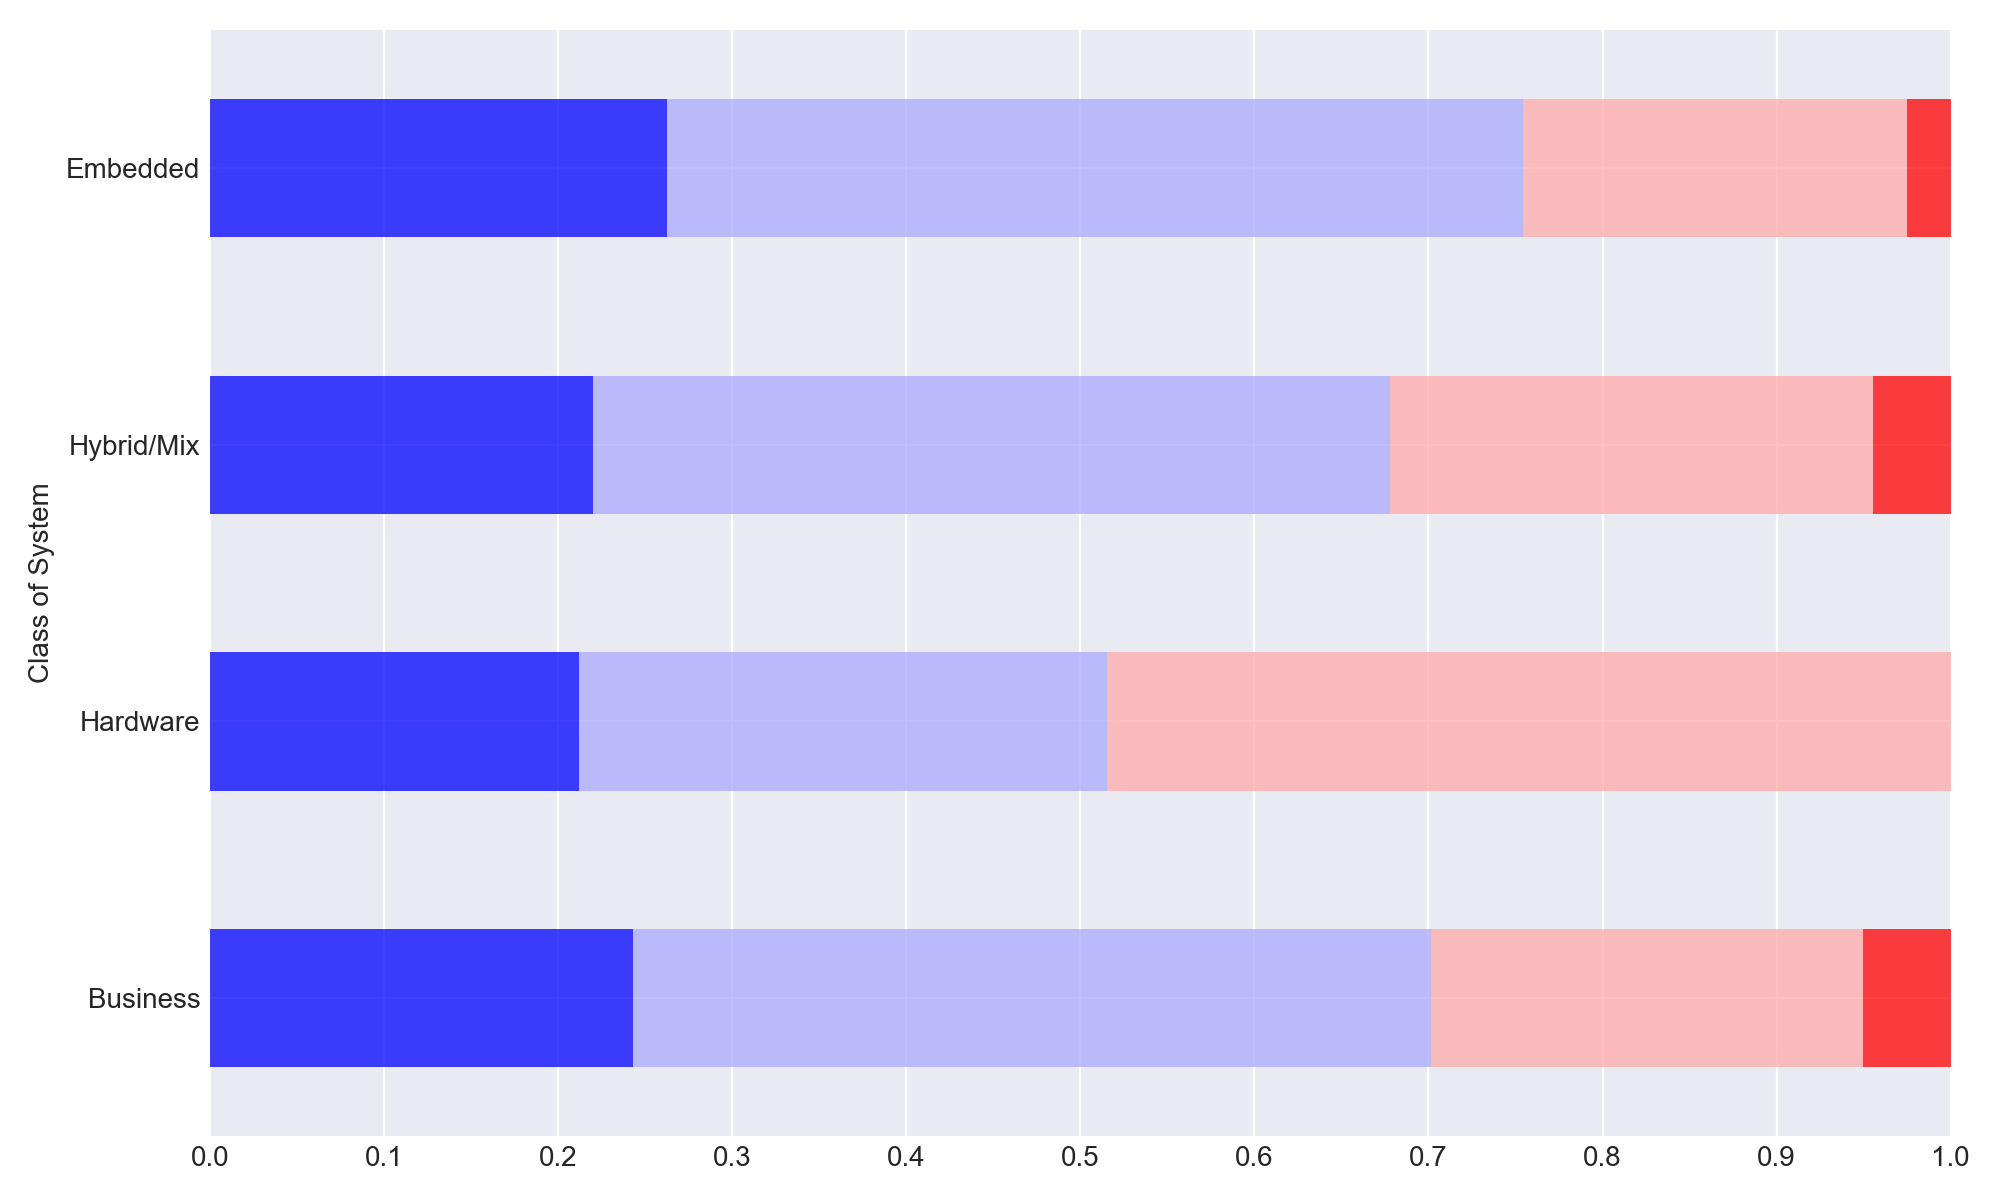

In [37]:
(systems.T / systems.T.sum()).T.plot.barh(stacked=True, cmap='bwr', figsize=(10,6), alpha=0.75)
plt.xlim(0,1)
plt.yticks(np.arange(4), ['Business', 'Hardware', 'Hybrid/Mix', 'Embedded'])
plt.ylabel('Class of System')
plt.legend([])
plt.xticks(np.arange(0,1.1,0.1))
plt.tight_layout();
plt.savefig(f'../graphics/{now}_Respondents_System_Class_rel_coded.pdf')

### By Industry Sector (v_19_coded)

In [39]:
industry_sectors = df.groupby(['v_19_coded', 'Vote']).count()[['EvID']].reset_index(
).pivot('v_19_coded', 'Vote', 'EvID').fillna(0)
industry_sectors

Vote,Essential,Worthwhile,Unimportant,Unwise
v_19_coded,,,,
Academia,6.0,9.0,10.0,0.0
Aeronautics,22.0,51.0,24.0,1.0
Automation,9.0,21.0,7.0,3.0
Automotive,75.0,154.0,53.0,7.0
Consulting,9.0,18.0,3.0,0.0
E-Commerce,11.0,17.0,5.0,4.0
Education,16.0,37.0,29.0,6.0
Energy,18.0,20.0,9.0,3.0
Financial Services,73.0,133.0,71.0,11.0


<IPython.core.display.Javascript object>


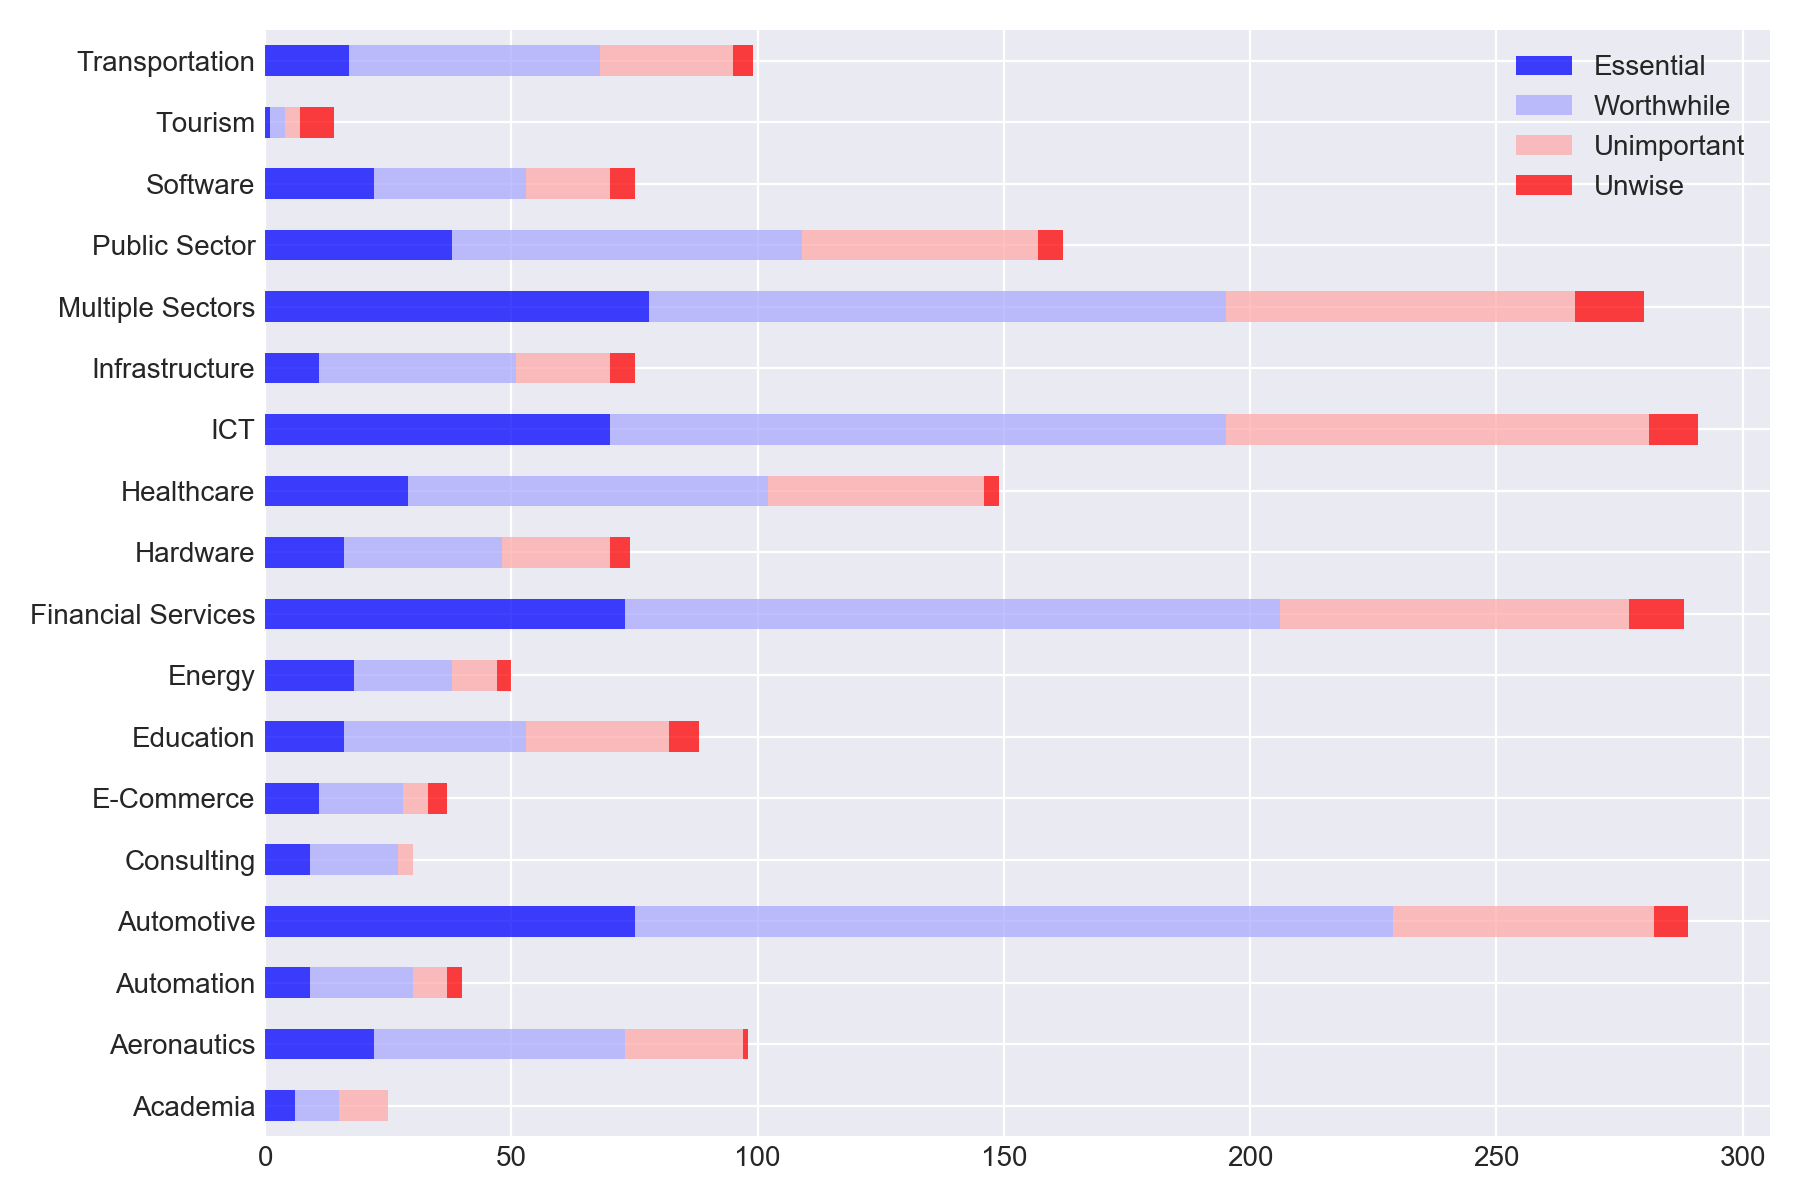

In [84]:
industry_sectors.plot.barh(stacked=True, cmap='bwr', figsize=(9,6), alpha=0.75)
plt.ylabel('')
plt.legend(title='')
plt.tight_layout()
plt.savefig(f'../graphics/{now}_Respondents_Industry_Sectors_abs_coded.pdf')

In [42]:
(industry_sectors.T / industry_sectors.T.sum()).T

Vote,Essential,Worthwhile,Unimportant,Unwise
v_19_coded,,,,
Academia,0.240000,0.360000,0.400000,0.000000
Aeronautics,0.224490,0.520408,0.244898,0.010204
Automation,0.225000,0.525000,0.175000,0.075000
Automotive,0.259516,0.532872,0.183391,0.024221
Consulting,0.300000,0.600000,0.100000,0.000000
E-Commerce,0.297297,0.459459,0.135135,0.108108
Education,0.181818,0.420455,0.329545,0.068182
Energy,0.360000,0.400000,0.180000,0.060000
Financial Services,0.253472,0.461806,0.246528,0.038194


<IPython.core.display.Javascript object>


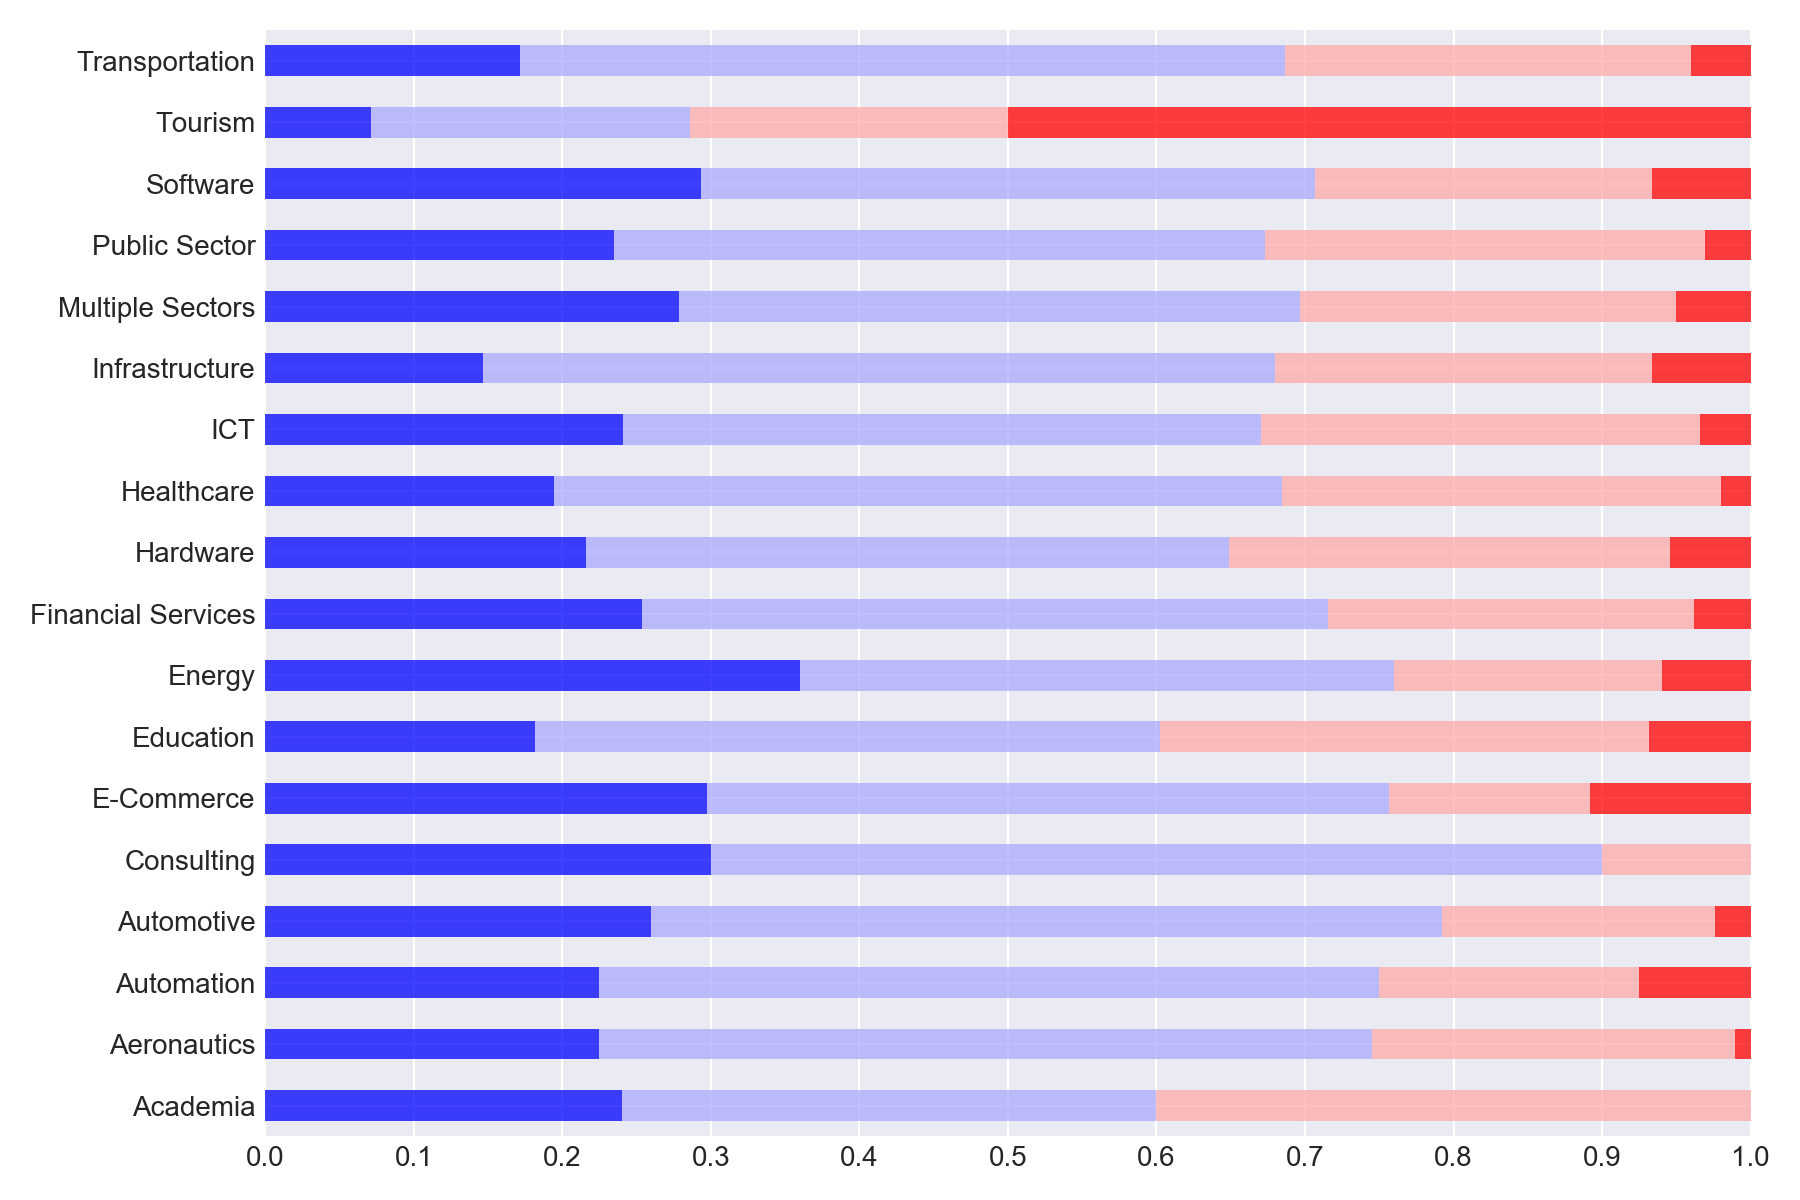

In [99]:
(industry_sectors.T / industry_sectors.T.sum()).T.plot.barh(stacked=True, cmap='bwr', figsize=(9,6), alpha=0.75)
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.ylabel('')
plt.legend([]);
plt.tight_layout()
plt.savefig(f'../graphics/{now}_Respondents_Industry_Sectors_rel_coded.pdf')

### Degree of Involvement in RE

NB: I have no idea why this was not implemented as a single-selection question. 
The way participants answered, it is impossible to cleanly define what they answered. 
Some might have understood the question so as to tick only their 'maximum' involvement, seeing the first three levels in a 'nested/subset' relationship (especially due to the word 'extent' in the question).
Others might have ticked just one, not seeing the subset relationship.
Others might have ticked all degrees of involvement that apply.

In [86]:
reqvars = ['v_'+str(x) for x in range(118,122)]

Let's see whether the answers are at least internally consistent by looking at v_118-v_121 in their bitvector representations.

In [87]:
involvement = df[reqvars].replace(['quoted', 'not quoted'], [1,0]).stack()

In [88]:
involvement.head()

0  v_118    1
   v_119    1
   v_120    1
   v_121    0
1  v_118    1
dtype: int64

In [89]:
answers = [tuple(involvement[x].values) for x in involvement.index.levels[0]]

In [90]:
set(answers)

{(0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 1, 0),
 (1, 0, 0, 0),
 (1, 0, 1, 0),
 (1, 1, 0, 0),
 (1, 1, 1, 0)}

Of the different answer vectors, (0,0,1,1), (1,0,1,0), (1,1,0,0) seem problematic, as seem either (1,0,0,0), (0,1,0,0), (0,0,1,0) or (1,1,1,0), (0,1,1,0), (1,1,0,0), depending on the viewpoint. It will be hard to derive anything meaningful from this...

In [91]:
reqvectors = pd.DataFrame(df[['EvID', 'Vote']], copy=True)
reqvectors['InvolvementVector'] = answers
reqvectors.head()

,EvID,Vote,InvolvementVector
0,2,Worthwhile,"(1, 1, 1, 0)"
1,2,Unwise,"(1, 1, 1, 0)"
2,2,Essential,"(1, 1, 1, 0)"
3,2,Unimportant,"(1, 1, 1, 0)"
4,2,Unwise,"(1, 1, 1, 0)"


In [92]:
rvdf = reqvectors.groupby(['InvolvementVector', 'Vote']).count().fillna(0).reset_index(
).pivot('InvolvementVector', 'Vote', 'EvID')
rvdf

Vote,Essential,Worthwhile,Unimportant,Unwise
InvolvementVector,,,,
"(0, 0, 0, 1)",4,13,9,4
"(0, 0, 1, 0)",52,58,20,2
"(0, 0, 1, 1)",1,11,1,2
"(0, 1, 0, 0)",84,152,67,16
"(0, 1, 1, 0)",58,114,50,9
"(1, 0, 0, 0)",160,334,209,30
"(1, 0, 1, 0)",30,40,30,2
"(1, 1, 0, 0)",66,131,63,13
"(1, 1, 1, 0)",66,150,99,14


<IPython.core.display.Javascript object>


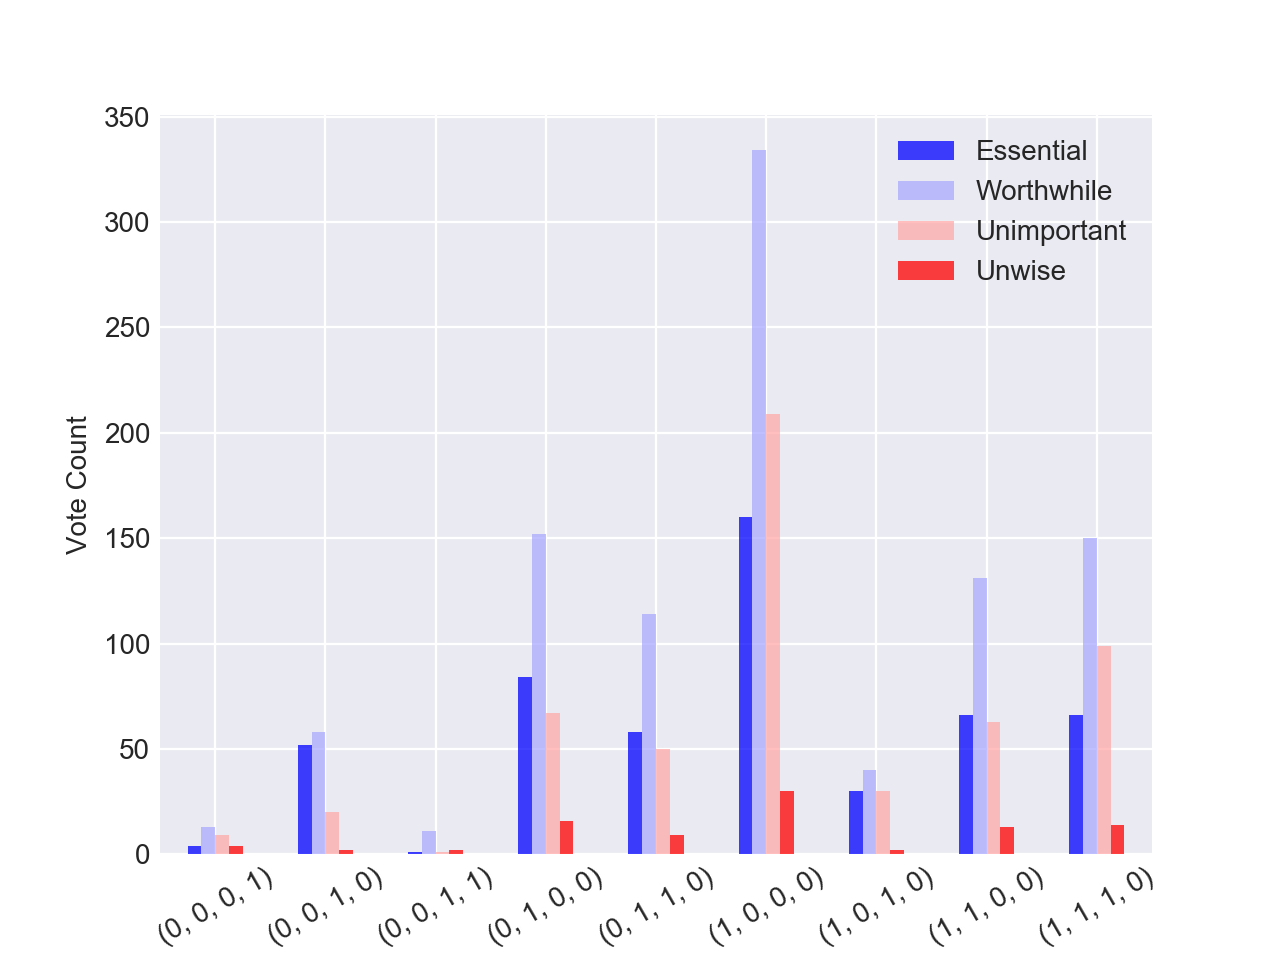

In [93]:
rvdf.plot.bar(cmap='bwr', rot=30, alpha=0.75)
plt.legend(title='')
plt.ylabel('Vote Count');
plt.savefig(f'../graphics/{now}_Respondents_Involvement_Vector_abs_coded.pdf')

<IPython.core.display.Javascript object>


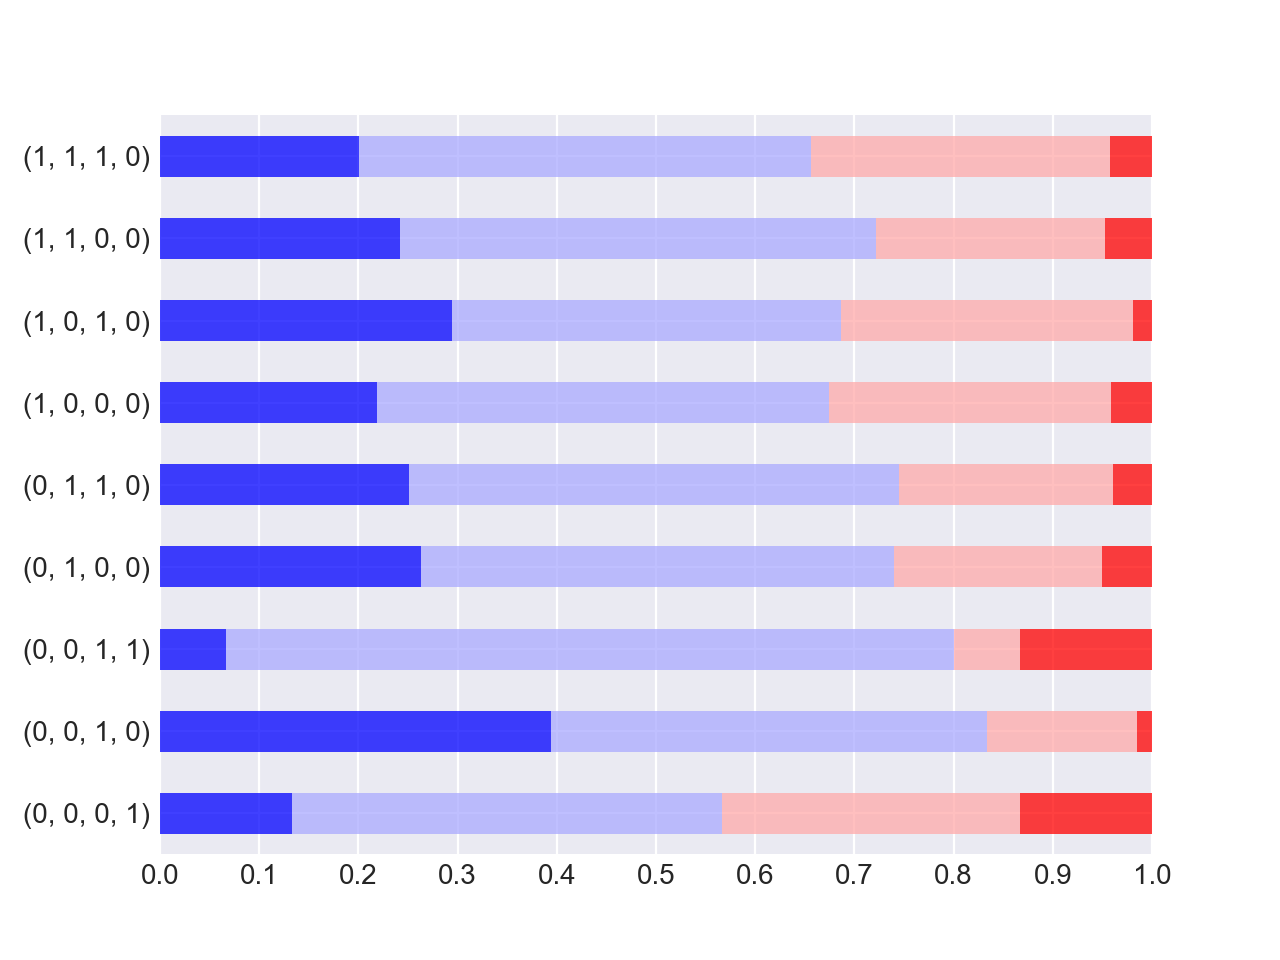

In [94]:
(rvdf.T / rvdf.T.sum()).T.plot.barh(stacked=True, cmap='bwr', rot=0, alpha=0.75)
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.ylabel('')
plt.legend([]);
plt.savefig(f'../graphics/{now}_Respondents_Involvement_Vector_rel_coded.pdf')

In my opinion, it would be unwise to look just at the maximum involvement (e.g., pooling (1,0,0,0), (1,0,1,0), (1,0,1,0) and (1,1,1,0), as participants might well have understood the question differently...

The End.